### Big Data HW #2

# Analysis Overview

* Deep learning is one of the hottest and most developing areas within the field of Machine Learning.
* Deep learning can handle big data very well; while other networks can also handle big data, they are often times killed by complexity
* In today's analysis we will employ DNN on the MNIST and CIFAR-10 datasets along with their embeddings after different dimension reduction methods are performed on them
* We will compare the metrics of these models under these different embeddings and under ADAM and SGD optimizers
* Given the complexity of the analysis, we use GPU to speed it up

# Import MNIST Data

* One of two datasets we will be working with today is the MNIST dataset
* This dataset is a collection of handwritten digits used to train and test classification systems

In [2]:
from sklearn.datasets import fetch_openml
# Load the MNIST dataset
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
# Separate the features and target
X, y = mnist.data, mnist.target
# Convert target to numeric
y = y.astype(int)
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

Shape of X: (70000, 784)
Shape of y: (70000,)


# Import CIFAR-10 Data

* The other dataset we will be analyzing it the CIFAR-10 datset
* This dataset contains 60000 32x32 pixelated images divided into 10 equal, mutually exclusive classes
* The 10 classes are airplanes, cars, birds, cats, deer, dogs, frogs, horses, ships, and trucks

In [3]:
from tensorflow.keras.datasets import cifar10
# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
# Print summary of CIFAR-10 data
print("Training data shape:", x_train.shape) # (50000, 32, 32, 3)
print("Training labels shape:", y_train.shape) # (50000, 1)
print("Testing data shape:", x_test.shape) # (10000, 32, 32, 3)
print("Testing labels shape:", y_test.shape) # (10000, 1)

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 51s 0us/step
Training data shape: (50000, 32, 32, 3)
Training labels shape: (50000, 1)
Testing data shape: (10000, 32, 32, 3)
Testing labels shape: (10000, 1)


# Load Packages

In [4]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam, SGD
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Normalize Pixels

* For both datasets, we normalize the pixel values by dividing them by 255
* This is because the images of each dataset have different pixel intensity levels ranging from 0 to 255
* For the cifar data, we flatten the images to a 1-D array

In [5]:
X = X / 255.0  # Normalize pixel values

# Split into training and test sets
from sklearn.model_selection import train_test_split
x_train_mnist, x_test_mnist, y_train_mnist, y_test_mnist = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
x_train_cifar, y_train_cifar, x_test_cifar, y_test_cifar = x_train, y_train, x_test, y_test
x_train_cifar, x_test_cifar = x_train_cifar / 255.0, x_test_cifar / 255.0
y_train_cifar, y_test_cifar = y_train_cifar.flatten(), y_test_cifar.flatten()

# Building, Training, and Evaluating DNN on Non-Reduced Datasets

* We define this function that will run our model, which we will call many times throughout the analysis
* We build this DNN with 3 hidden layers, each of which has 200, 100, 50 neurons, to classify the MINIST and CIFAR10 data dataset
* We use the activation function reLU, which introduces non-linearity and can help prevent any vanishing gradient
* Vanishing gradient is when loss plateaus and the model doesn't appear to improve even in initial stages of training
* The mathematical formual for reLU is max(0, x)
* Since there are 10 classes for the data, we insert a softmax layer with 10 neurons

In [7]:
# Define the model
def build_dnn(input_shape):
    model = Sequential([
        Flatten(input_shape=input_shape),
        Dense(200, activation='relu'),
        Dense(100, activation='relu'),
        Dense(50, activation='relu'),
        Dense(10, activation='softmax')
    ])
    return model

* We train the model under ADAM and SGD optimizers using 100 epochs
* ADAM: adjusts the learning rate for each parameter in a neural network based on its gradient history
* SGD: starts with random weights, uses small batches of data, then computes the gradient of these batches before calcualating loss function and updating its weights based on it
* ADAM is known to have good reproducibility but to be prone to overfitting
* SGD is more robust to overfitting, but has worse reproducibility than ADAM

In [8]:
# Compile and train models with specified optimizers
def train_model(optimizer_name, x_train, y_train, x_test, y_test, epochs=100):
    input_shape = x_train.shape[1:]
    model = build_dnn(input_shape)
    optimizer = Adam() if optimizer_name == "adam" else SGD()
    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=epochs)
    return model, history

In [9]:
# Train and evaluate model on CIFAR-10 with Adam and SGD optimizers
# Train and evaluate model on CIFAR-10 with Adam and SGD optimizers
mnist_adam_model, mnist_adam_history = train_model("adam", x_train_mnist, y_train_mnist, x_test_mnist, y_test_mnist)
mnist_sgd_model, mnist_sgd_history = train_model("sgd", x_train_mnist, y_train_mnist, x_test_mnist, y_test_mnist)

cifar_adam_model, cifar_adam_history = train_model("adam", x_train_cifar, y_train_cifar, x_test_cifar, y_test_cifar)
cifar_sgd_model, cifar_sgd_history = train_model("sgd", x_train_cifar, y_train_cifar, x_test_cifar, y_test_cifar)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.8731 - loss: 0.4186 - val_accuracy: 0.9650 - val_loss: 0.1210
Epoch 2/100
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9698 - loss: 0.0988 - val_accuracy: 0.9709 - val_loss: 0.0995
Epoch 3/100
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9798 - loss: 0.0657 - val_accuracy: 0.9741 - val_loss: 0.0922
Epoch 4/100
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9849 - loss: 0.0457 - val_accuracy: 0.9720 - val_loss: 0.0958
Epoch 5/100
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9880 - loss: 0.0362 - val_accuracy: 0.9687 - val_loss: 0.1257
Epoch 6/100
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9891 - loss: 0.0318 - val_accuracy: 0.9770 - val_loss: 0.0976
Epoch 7/100
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9922 - loss: 0.0248 - val_accuracy: 0.9751 - val_loss: 0.1067
Epoch 8/100
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9915 - loss: 0

# Non-Reduced Data Metrics: Accuracy, Precision, Recall, and F1

We calculate the following metrics for the both DNN models:
* Accuracy: How often the model's classification is correct
* Precision: How often the model correctly predicts a positive class out of the ACTUAL results
* Recall: How often the model correctly predicts a positive class out of the PREDICTED
* F1-Score: Combines precision and recall to evaluate a model's performance

We will create a function that performs all of these metrics and confusion matrix along with one that visualizes the confusion matrix using Seaborn

438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


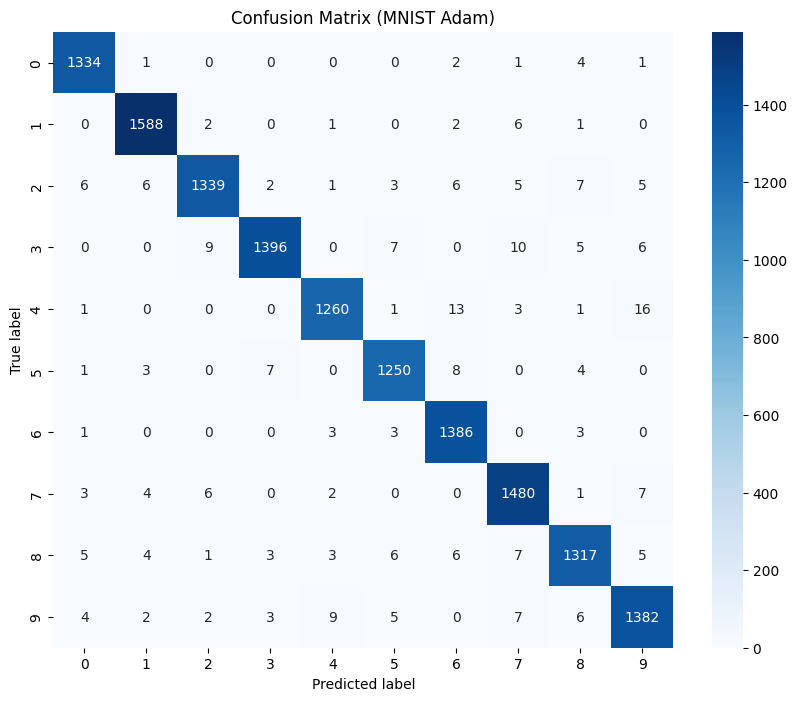

Accuracy: 0.9808571428571429, Precision: 0.980872651164203, Recall: 0.9806470496150135, F1 Score: 0.9807291462676748
438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


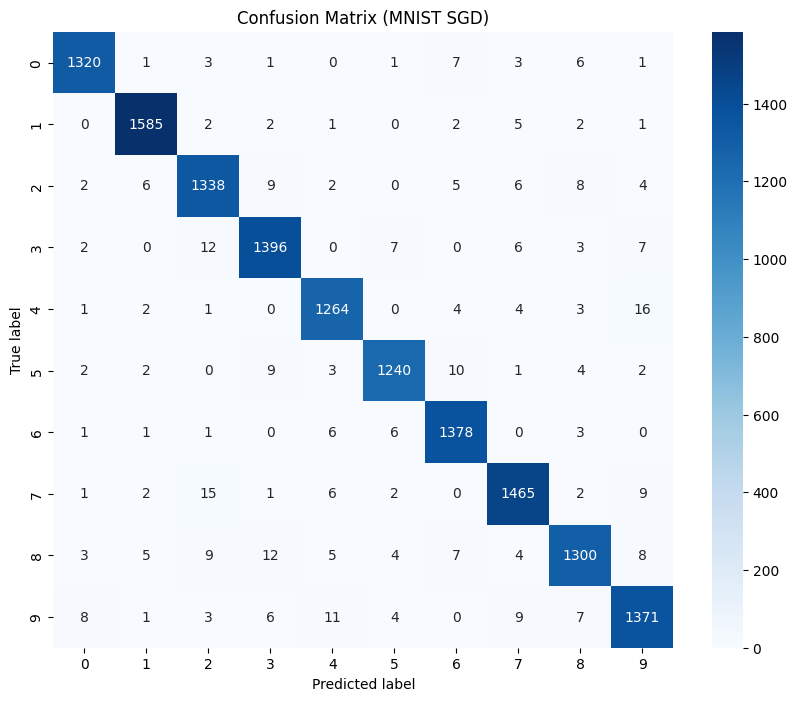

Accuracy: 0.9755, Precision: 0.9754059936536557, Recall: 0.9752694966772639, F1 Score: 0.975327310474216
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


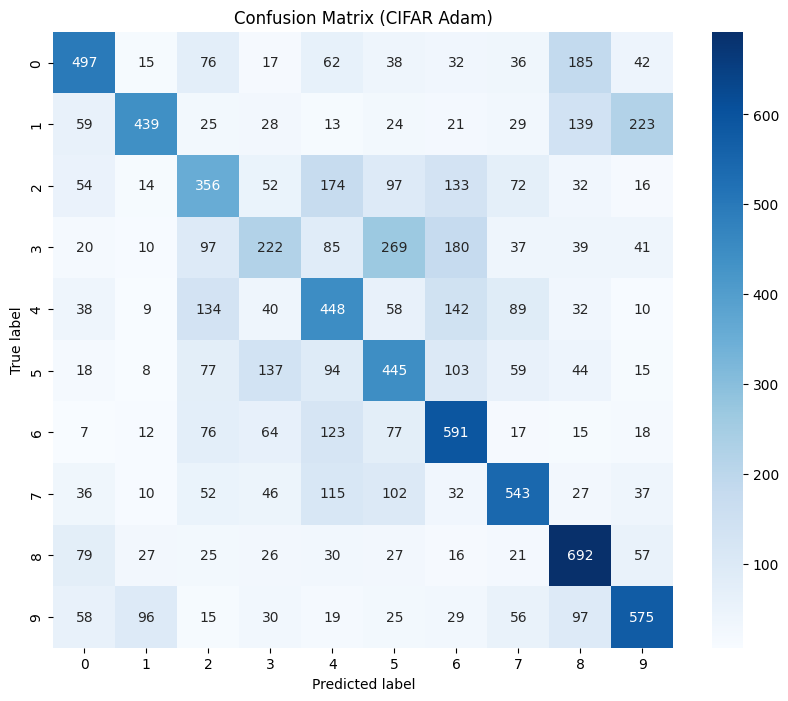

Accuracy: 0.4808, Precision: 0.4860801269665835, Recall: 0.4808, F1 Score: 0.4769056572459496
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


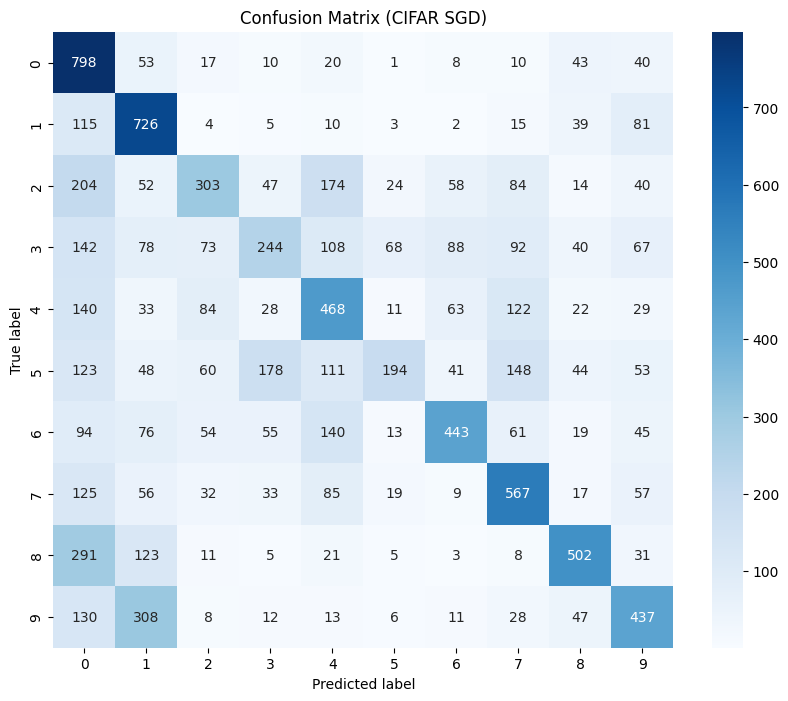

Accuracy: 0.4682, Precision: 0.49162056745384763, Recall: 0.46820000000000006, F1 Score: 0.4538686740658706


In [10]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def evaluate_model(model, x_test, y_test):
    y_pred = np.argmax(model.predict(x_test), axis=1)
    cm = confusion_matrix(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='macro')
    recall = recall_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')
    return cm, accuracy, precision, recall, f1

import seaborn as sns

def plot_confusion_matrix(cm, classes, title='Confusion Matrix', cmap=plt.cm.Blues):
  plt.figure(figsize=(10, 8))
  sns.heatmap(cm, annot=True, fmt='d', cmap=cmap, xticklabels=classes, yticklabels=classes)
  plt.title(title)
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()

class_names = list(range(10))

mnist_cm_adam, mnist_accuracy_adam, mnist_precision_adam, mnist_recall_adam, mnist_f1_adam = evaluate_model(mnist_adam_model, x_test_mnist, y_test_mnist)
plot_confusion_matrix(mnist_cm_adam, classes=class_names, title='Confusion Matrix (MNIST Adam)')
print(f"Accuracy: {mnist_accuracy_adam}, Precision: {mnist_precision_adam}, Recall: {mnist_recall_adam}, F1 Score: {mnist_f1_adam}")

mnist_cm_sgd, mnist_accuracy_sgd, mnist_precision_sgd, mnist_recall_sgd, mnist_f1_sgd = evaluate_model(mnist_sgd_model, x_test_mnist, y_test_mnist)
plot_confusion_matrix(mnist_cm_sgd, classes=class_names, title='Confusion Matrix (MNIST SGD)')
print(f"Accuracy: {mnist_accuracy_sgd}, Precision: {mnist_precision_sgd}, Recall: {mnist_recall_sgd}, F1 Score: {mnist_f1_sgd}")

cifar_cm_adam, cifar_accuracy_adam, cifar_precision_adam, cifar_recall_adam, cifar_f1_adam = evaluate_model(cifar_adam_model, x_test_cifar, y_test_cifar)
plot_confusion_matrix(cifar_cm_adam, classes=class_names, title='Confusion Matrix (CIFAR Adam)')
print(f"Accuracy: {cifar_accuracy_adam}, Precision: {cifar_precision_adam}, Recall: {cifar_recall_adam}, F1 Score: {cifar_f1_adam}")

cifar_cm_sgd, cifar_accuracy_sgd, cifar_precision_sgd, cifar_recall_sgd, cifar_f1_sgd = evaluate_model(cifar_sgd_model, x_test_cifar, y_test_cifar)
plot_confusion_matrix(cifar_cm_sgd, classes=class_names, title='Confusion Matrix (CIFAR SGD)')
print(f"Accuracy: {cifar_accuracy_sgd}, Precision: {cifar_precision_sgd}, Recall: {cifar_recall_sgd}, F1 Score: {cifar_f1_sgd}")

# Metrics Observations: Non-Reduced Data

* For all four models, whether good or bad performance, all four of their metrics are around the same value
* The models for the MNIST data returned metrics of around 0.97-0.98, much better than that of the CIFAR models metrics of about 0.45-0.49
* In both methods, ADAM returned better metrics than SGD
* However, for CIFAR, SGD had a better precision than that of ADAM


# Non-Reduced Data: Plot Loss

* We plot the training and validation losses for each model under each dataset and optimizer
* The loss used is Sparse Categorical Cross-Entropy Loss, which is the sum of (true labels * log(predicted probability))
* If there is a large increase in validation loss or it is significantly larger than the training loss, then the model is overfitting
* If the models are relatively equal, then model is neither overfitting or underfitting and is generalizing well to unseen data
* The training loss should NOT be larger than the validation loss

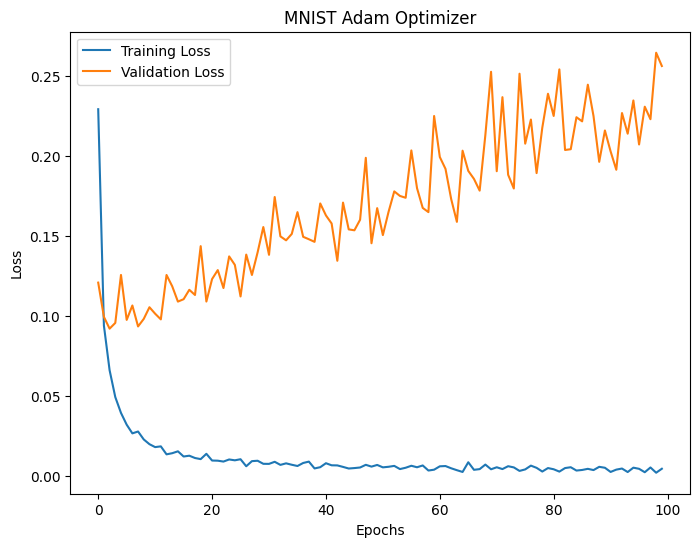

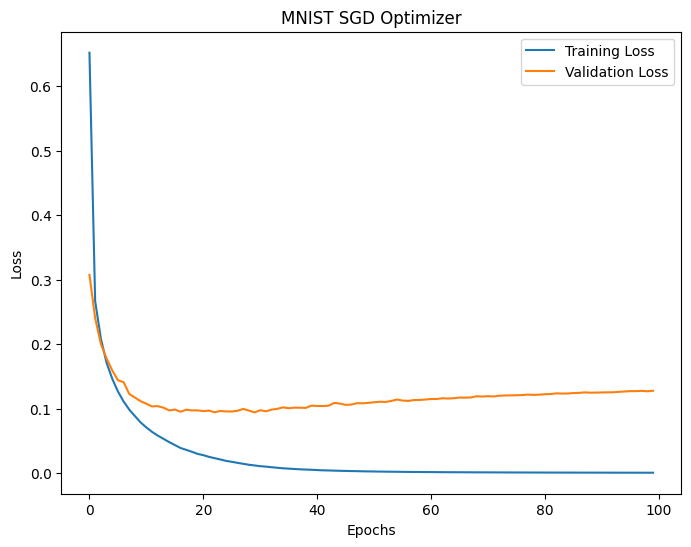

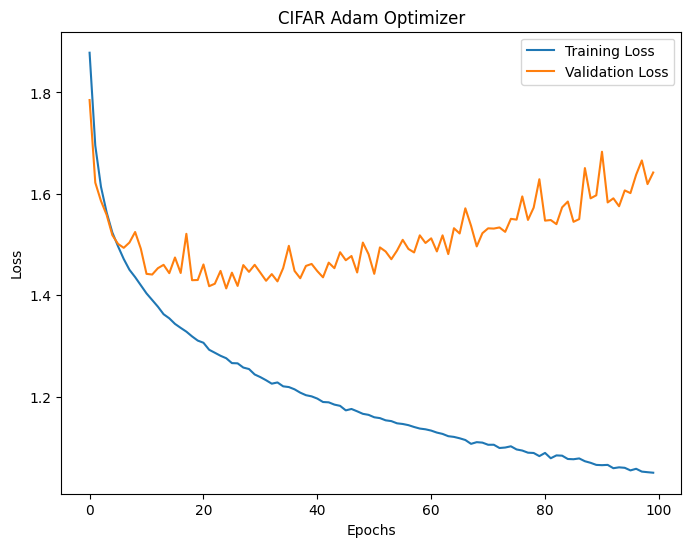

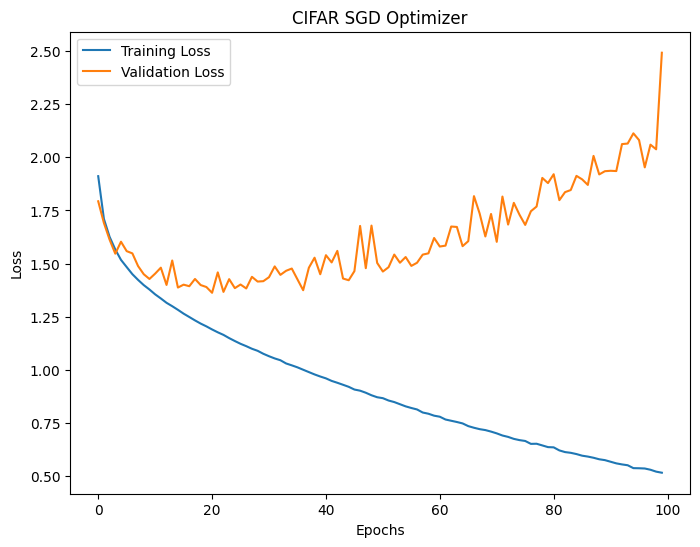

In [11]:
def plot_loss(history, title):
    plt.figure(figsize=(8, 6))
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(title)
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

plot_loss(mnist_adam_history, "MNIST Adam Optimizer")
plot_loss(mnist_sgd_history, "MNIST SGD Optimizer")
plot_loss(cifar_adam_history, "CIFAR Adam Optimizer")
plot_loss(cifar_sgd_history, "CIFAR SGD Optimizer")

# Loss Plot Observations: Non-Reduced Data

* 3 out of the 4 models expereince an scenario where the validation loss greatly exceeds the training loss as more epochs are iterated over
* The MNIST SGD model has the least difference between its training and validation loss showing that it has very solid reproducibility

# Non-Reduced Data: η and η Ratios

* For each loss (training and validation) of each model, we calculate η or eta
* The formula for this is η = 1 − (σ/μ+epsilon)^2
* The purpose of η is to measure the stability of loss curves
* A high η indicates a very stable loss and low η indicates an unstable loss that significantly fluctuates
* A good or bad loss stability can help us determine if the training or validation are learning consistently


* The η ratio is validation loss/test loss
* If the η ratio is close to or equal to 1, then the training and validation have similar stability
* If the η ratio is greater than 1, validation loss is more stable than the training, thus creating an overfitting model
* If the η ratio is less than 1, the training loss is more stable than the validation loss to challenges in covergence or high noise

In [12]:
def calculate_eta(loss_values):
    loss_values = np.array(loss_values)
    sigma = np.std(loss_values)
    mu = np.mean(loss_values)
    epsilon = 1e-10
    eta = 1 - (sigma / (mu + epsilon)) ** 2
    return eta

eta_train_mnist_adam = calculate_eta(mnist_adam_history.history['loss'])
eta_val_mnist_adam = calculate_eta(mnist_adam_history.history['val_loss'])
eta_train_mnist_sgd = calculate_eta(mnist_sgd_history.history['loss'])
eta_val_mnist_sgd = calculate_eta(mnist_sgd_history.history['val_loss'])
eta_train_ciphar_adam = calculate_eta(cifar_adam_history.history['loss'])
eta_val_cifar_adam = calculate_eta(cifar_adam_history.history['val_loss'])
eta_train_ciphar_sgd = calculate_eta(cifar_sgd_history.history['loss'])
eta_val_cifar_sgd = calculate_eta(cifar_sgd_history.history['val_loss'])

print(f"η (MNIST, Adam, Train): {eta_train_mnist_adam}, η (MNIST, Adam, Validation): {eta_val_mnist_adam}")
print(f"η (MNIST, SGD, Train): {eta_train_mnist_sgd}, η (MNIST, SGD, Validation): {eta_val_mnist_sgd}")
print(f"η (CIFAR, Adam, Train): {eta_train_ciphar_adam}, η (CIFAR, Adam, Validation): {eta_val_cifar_adam}")
print(f"η (CIFAR, SGD, Train): {eta_train_ciphar_sgd}, η (CIFAR, SGD, Validation): {eta_val_cifar_sgd}")

η (MNIST, Adam, Train): -3.3292885217659247, η (MNIST, Adam, Validation): 0.928225586453286
η (MNIST, SGD, Train): -6.7036726065950685, η (MNIST, SGD, Validation): 0.9432160810332714
η (CIFAR, Adam, Train): 0.9842200607163163, η (CIFAR, Adam, Validation): 0.997887074326744
η (CIFAR, SGD, Train): 0.8890929441442712, η (CIFAR, SGD, Validation): 0.9813374943682692


In [13]:
from math import e
eta_ratio_mnist_adam = eta_val_mnist_adam / eta_train_mnist_adam
eta_ratio_mnist_sgd = eta_val_mnist_sgd / eta_train_mnist_sgd
eta_ratio_cifar_adam = eta_val_cifar_adam / eta_train_ciphar_adam
eta_ratio_cifar_sgd = eta_val_cifar_sgd / eta_train_ciphar_sgd

print(f"η Ratio (MNIST Adam): {eta_ratio_mnist_adam}")
print(f"η Ratio (MNIST SGD): {eta_ratio_mnist_sgd}")
print(f"η Ratio (CIFAR Adam): {eta_ratio_cifar_adam}")
print(f"η Ratio (CIFAR SGD): {eta_ratio_cifar_sgd}")

η Ratio (MNIST Adam): -0.27880599124552163
η Ratio (MNIST SGD): -0.1407013940545569
η Ratio (CIFAR Adam): 1.0138861359932867
η Ratio (CIFAR SGD): 1.1037513016288538


# η and η Ratio Observations: Non-Reduced Data

* The η ratios are very close to 1 for both CIFAR models
* However, surprisingly, the MNIST SGD model, which has been performing very well, is much less than 1 at -0.14
* The MNIST Adam ratio is also far from 1 at -0.2788
* Overall the CIFAR models are have stable loss functions, where as the MNIST models experience some possible underfitting

# Non-Reduced Data Overall Observations

* Overall, despite not having the best η ratio and stability, the MNIST models returned much better metrics than the CIFAR models
* Typically ADAM is more reproducible than SGD, but it was MNIST's SGD that was by far the most reproducible model
* We can conclude that for non-reducted data, the data itself has more effect on whether the model is overfitting, rather than the model itself
* From these results, we would like to conclude that the MNIST SGD model performed the best due to its high metrics and reproducibility

# Dimenstion Reduction and Stacking on the DNN Model

* For the next part, we will run the same models and conduct the same analyses, but on PCA reduced data and embeddings of stacking using PCA+TSNE and PCA+UMAP


As a refresher:
* PCA: a linear dimension reduction method that projects input data to onto a lower-dimensional space that preserves as much data variances as possible
* TSNE (t-Distributed Neighbor Embedding): A local, nonlinear dimension reduction method that projects input data to onto a lower-dimensional space
* UMAP (Uniform Manifold Approximation and Projection): Another dimension reduction method similar to TSNE that is faster and less random


* To fit our dimension reduction models, we reshape the training and testing data of the CIFAR-10 data

In [14]:
x_train_cifar = x_train_cifar.reshape(x_train_cifar.shape[0], -1)
x_test_cifar = x_test_cifar.reshape(x_test_cifar.shape[0], -1)

# Define PCA Function

* We conduct this PCA function while keeping 80% explained variance ratio
* We will iterate the TSNE and UMAP functions over the PCA data for the stacking parts of the analysis

In [15]:
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
def doPCA(x_train, x_test, explained_variance_ratio):
  pca = PCA()
  newPCATraining = pca.fit_transform(x_train)
  newPCATesting = pca.transform(x_test)
  explained_variance_ratios = np.cumsum(pca.explained_variance_ratio_)
  # at which PC, the explained_variance_ratio reaches the cutoff
  n_components = np.argmax(explained_variance_ratios >= explained_variance_ratio) + 1
  newPCATraining=newPCATraining[:,:n_components]
  newPCATesting=newPCATesting[:,:n_components]
  return newPCATraining, newPCATesting

# Define TSNE Function

* We define the TSNE function using parameters of 2 components, a maximum iterations of 3000, and a learning rate of 200
* We will use a perplexity of 30 and PCA initiation method
* We will visualize the embeddings of the PCA+TSNE stacking

In [16]:
def doTSNE(x_train, x_test, perplex_tsne, init_tsne):
  tsne = TSNE(n_components=2, perplexity=perplex_tsne, init=init_tsne,
              random_state=42, max_iter=3000, learning_rate=200)
  newTSNETraining = tsne.fit_transform(x_train)
  newTSNETesting = tsne.fit_transform(x_test)
  return newTSNETraining, newTSNETesting

# Define UMAP Function

**INSTALL UMAP**

In [17]:
!pip install -q umap-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.8/88.8 kB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 4.7 MB/s eta 0:00:00


* For UMAP we will keep five dimensions, by using neighbor_size=5, and use spectral as our initiation method

In [18]:
import umap

# do UMAP to get new data in UMAP pspace
def doUMAP(x_train, x_test, neighbor_size, init):
  umap_ = umap.UMAP(n_neighbors=neighbor_size, init=init)
  newUMAPTraining = umap_.fit_transform(x_train, )
  newUMAPTesting = umap_.transform(x_test, )
  return newUMAPTraining, newUMAPTesting

# Training and Evaluating DNN on PCA Data

Get new PCA data

In [19]:
x_train_pca_mnist, x_test_pca_mnist = doPCA(x_train_mnist, x_test_mnist, 0.8)
x_train_pca_cifar, x_test_pca_cifar = doPCA(x_train_cifar, x_test_cifar, 0.8)
y_train_pca_mnist, y_test_pca_mnist = y_train_mnist, y_test_mnist
y_train_pca_cifar, y_test_pca_cifar = y_train_cifar, y_test_cifar

Run the model on the PCA data

In [20]:
mnist_adam_model_pca, mnist_adam_history_pca = train_model("adam", x_train_pca_mnist, y_train_pca_mnist, x_test_pca_mnist, y_test_pca_mnist)
mnist_sgd_model_pca, mnist_sgd_history_pca = train_model("sgd", x_train_pca_mnist, y_train_pca_mnist, x_test_pca_mnist, y_test_pca_mnist)

cifar_adam_model_pca, cifar_adam_history_pca = train_model("adam", x_train_pca_cifar, y_train_pca_cifar, x_test_pca_cifar, y_test_pca_cifar)
cifar_sgd_model_pca, cifar_sgd_history_pca = train_model("sgd", x_train_pca_cifar, y_train_pca_cifar, x_test_pca_cifar, y_test_pca_cifar)

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1750/1750 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.8685 - loss: 0.4397 - val_accuracy: 0.9652 - val_loss: 0.1124
Epoch 2/100
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9715 - loss: 0.0914 - val_accuracy: 0.9684 - val_loss: 0.1054
Epoch 3/100
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9795 - loss: 0.0633 - val_accuracy: 0.9727 - val_loss: 0.0867
Epoch 4/100
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9842 - loss: 0.0475 - val_accuracy: 0.9764 - val_loss: 0.0805
Epoch 5/100
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9870 - loss: 0.0398 - val_accuracy: 0.9751 - val_loss: 0.0808
Epoch 6/100
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9888 - loss: 0.0349 - val_accuracy: 0.9756 - val_loss: 0.0842
Epoch 7/100
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9899 - loss: 0.0296 - val_accuracy: 0.9781 - val_loss: 0.0847
Epoch 8/100
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9921 - loss: 0.0239 - val_

# PCA Data Metrics: Accuracy, Precision, Recall, and F1

438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


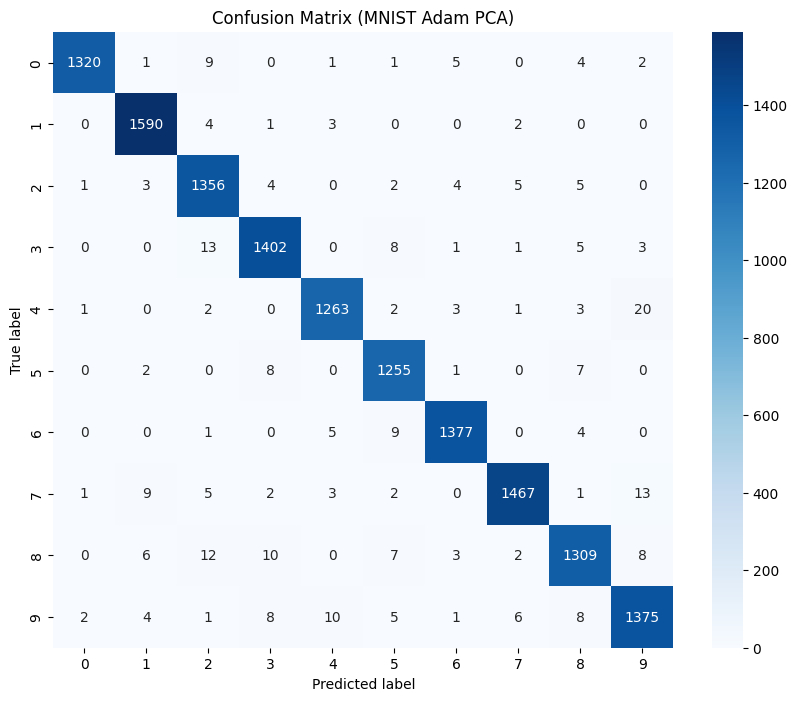

Accuracy: 0.9795714285714285, Precision: 0.9795025220279554, Recall: 0.9794124971916526, F1 Score: 0.9794322494644264
438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


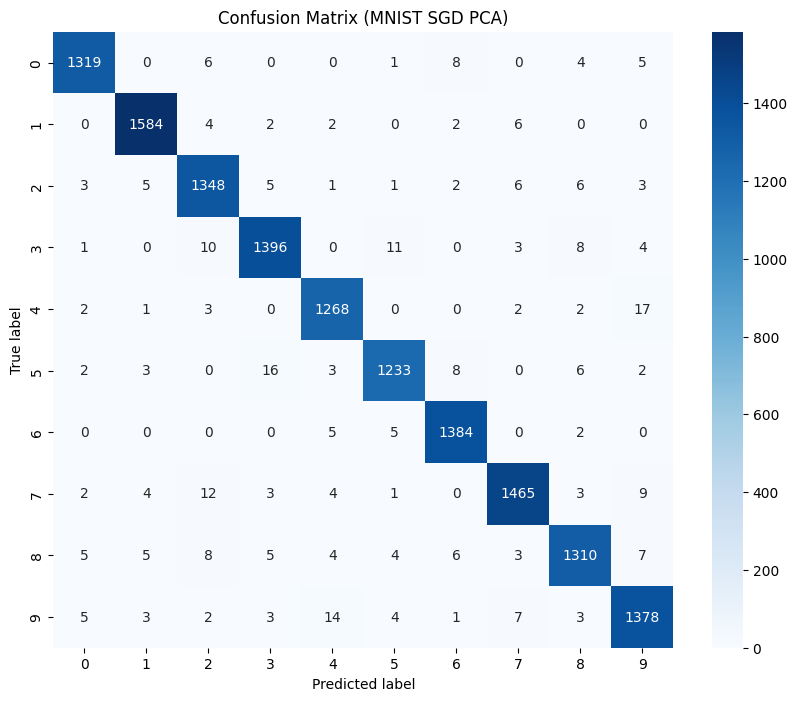

Accuracy: 0.9775, Precision: 0.9773593135127754, Recall: 0.9772758491845528, F1 Score: 0.9773051098556195
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


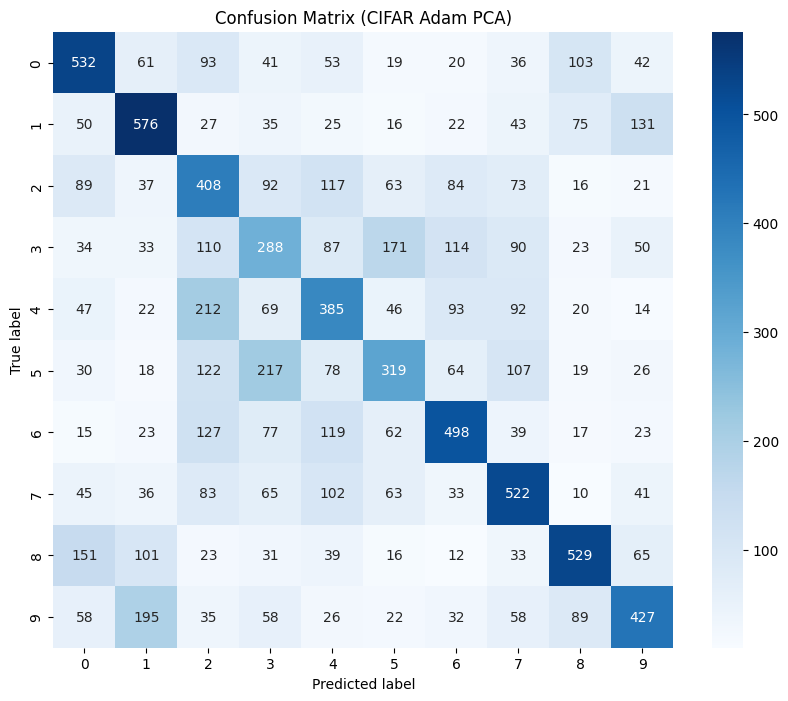

Accuracy: 0.4484, Precision: 0.4512958506956233, Recall: 0.4484, F1 Score: 0.4481763639776265
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


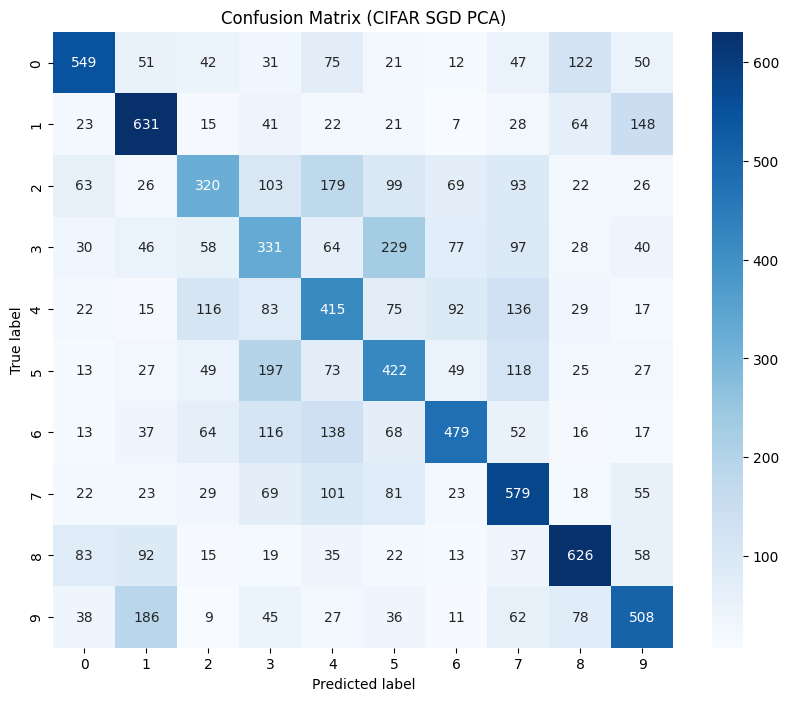

Accuracy: 0.486, Precision: 0.4909648231401279, Recall: 0.48600000000000004, F1 Score: 0.4855095184583755


In [21]:
class_names = list(range(10))

mnist_cm_adam_pca, mnist_accuracy_adam_pca, mnist_precision_adam_pca, mnist_recall_adam_pca, mnist_f1_adam_pca = evaluate_model(mnist_adam_model_pca, x_test_pca_mnist, y_test_pca_mnist)
plot_confusion_matrix(mnist_cm_adam_pca, classes=class_names, title='Confusion Matrix (MNIST Adam PCA)')
print(f"Accuracy: {mnist_accuracy_adam_pca}, Precision: {mnist_precision_adam_pca}, Recall: {mnist_recall_adam_pca}, F1 Score: {mnist_f1_adam_pca}")

mnist_cm_sgd_pca, mnist_accuracy_sgd_pca, mnist_precision_sgd_pca, mnist_recall_sgd_pca, mnist_f1_sgd_pca = evaluate_model(mnist_sgd_model_pca, x_test_pca_mnist, y_test_pca_mnist)
plot_confusion_matrix(mnist_cm_sgd_pca, classes=class_names, title='Confusion Matrix (MNIST SGD PCA)')
print(f"Accuracy: {mnist_accuracy_sgd_pca}, Precision: {mnist_precision_sgd_pca}, Recall: {mnist_recall_sgd_pca}, F1 Score: {mnist_f1_sgd_pca}")

cifar_cm_adam_pca, cifar_accuracy_adam_pca, cifar_precision_adam_pca, cifar_recall_adam_pca, cifar_f1_adam_pca = evaluate_model(cifar_adam_model_pca, x_test_pca_cifar, y_test_pca_cifar)
plot_confusion_matrix(cifar_cm_adam_pca, classes=class_names, title='Confusion Matrix (CIFAR Adam PCA)')
print(f"Accuracy: {cifar_accuracy_adam_pca}, Precision: {cifar_precision_adam_pca}, Recall: {cifar_recall_adam_pca}, F1 Score: {cifar_f1_adam_pca}")

cifar_cm_sgd_pca, cifar_accuracy_sgd_pca, cifar_precision_sgd_pca, cifar_recall_sgd_pca, cifar_f1_sgd_pca = evaluate_model(cifar_sgd_model_pca, x_test_pca_cifar, y_test_pca_cifar)
plot_confusion_matrix(cifar_cm_sgd_pca, classes=class_names, title='Confusion Matrix (CIFAR SGD PCA)')
print(f"Accuracy: {cifar_accuracy_sgd_pca}, Precision: {cifar_precision_sgd_pca}, Recall: {cifar_recall_sgd_pca}, F1 Score: {cifar_f1_sgd_pca}")

# Metrics Observations: PCA Data

* Under PCA, the metrics are all very similar to what they were before dimension reduction
* Once again, for each model, all four metrics are very similar to each other
* However, this time ADAM did not out perform SGD for any of the two datasets
* Overall, the metrics of ADAM slightly decreased for both ADAM models, while both SGD models retained pretty much the same metrics across the board

# PCA Data: Plot Loss

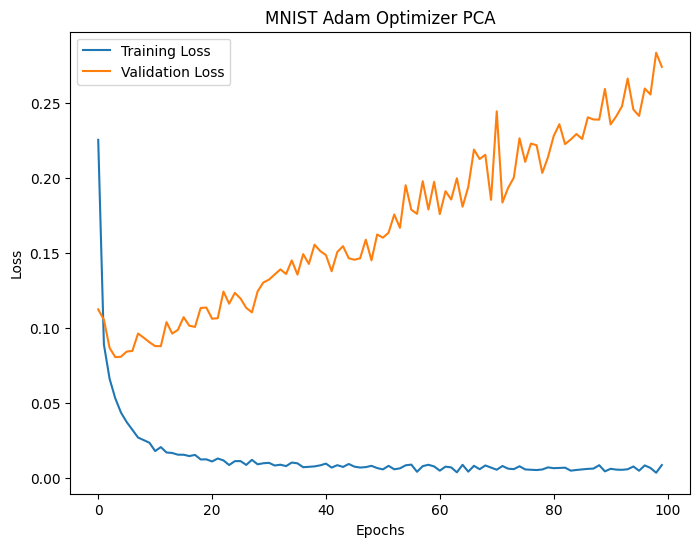

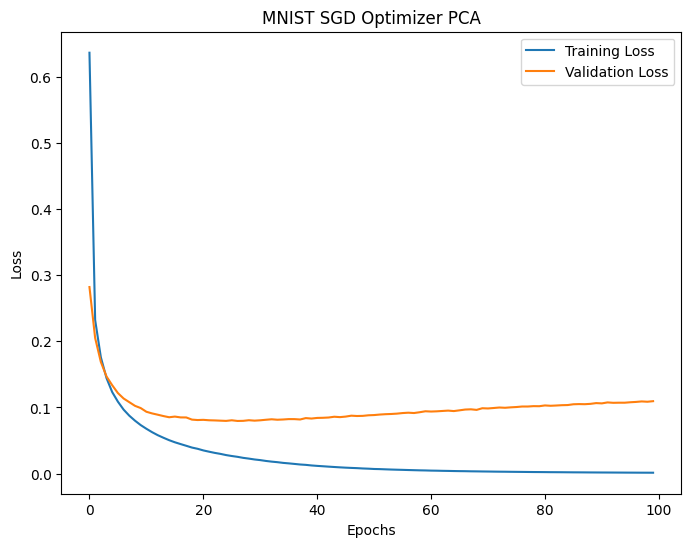

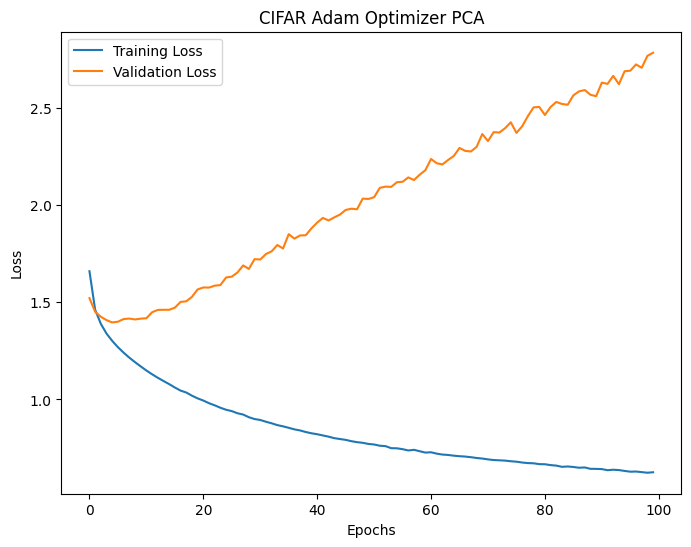

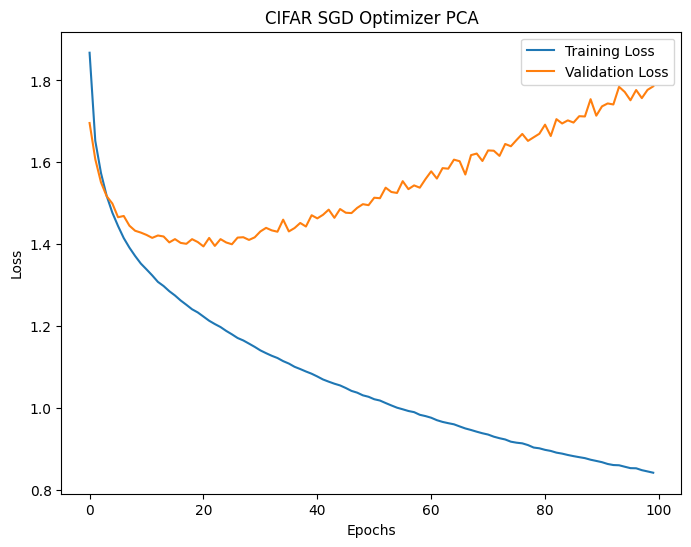

In [22]:
plot_loss(mnist_adam_history_pca, "MNIST Adam Optimizer PCA")
plot_loss(mnist_sgd_history_pca, "MNIST SGD Optimizer PCA")
plot_loss(cifar_adam_history_pca, "CIFAR Adam Optimizer PCA")
plot_loss(cifar_sgd_history_pca, "CIFAR SGD Optimizer PCA")

# Loss Plot Observations: PCA Data

* Similar to the metrics, the visualizations appear similar to the non-reduced data for the most part
* Once again, from the visualizations, it appears that SGD would have the best reproducibility, given it has the least validation loss and the most closely related loss curves
* However, for both CIFAR models, the validation loss curve is less squiggly leading us to believe it is more stable this time around
* Interestingly, the training loss curve for MNIST ADAM is slightly squiggly, being the first training curve so far to have this characteristic

# PCA Data: η and η Ratios

In [23]:
eta_train_mnist_adam_pca = calculate_eta(mnist_adam_history_pca.history['loss'])
eta_val_mnist_adam_pca = calculate_eta(mnist_adam_history_pca.history['val_loss'])
eta_train_mnist_sgd_pca = calculate_eta(mnist_sgd_history_pca.history['loss'])
eta_val_mnist_sgd_pca = calculate_eta(mnist_sgd_history_pca.history['val_loss'])
eta_train_ciphar_adam_pca = calculate_eta(cifar_adam_history_pca.history['loss'])
eta_val_cifar_adam_pca = calculate_eta(cifar_adam_history_pca.history['val_loss'])
eta_train_ciphar_sgd_pca = calculate_eta(cifar_sgd_history_pca.history['loss'])
eta_val_cifar_sgd_pca = calculate_eta(cifar_sgd_history_pca.history['val_loss'])

print(f"η (PCA MNIST, Adam, Train): {eta_train_mnist_adam_pca}, η (PCA MNIST, Adam, Validation): {eta_val_mnist_adam_pca}")
print(f"η (PCA MNIST, SGD, Train): {eta_train_mnist_sgd_pca}, η (PCA MNIST, SGD, Validation): {eta_val_mnist_sgd_pca}")
print(f"η (PCA CIFAR, Adam, Train): {eta_train_ciphar_adam_pca}, η (PCA CIFAR, Adam, Validation): {eta_val_cifar_adam_pca}")
print(f"η (PCA CIFAR, SGD, Train): {eta_train_ciphar_sgd_pca}, η (PCA CIFAR, SGD, Validation): {eta_val_cifar_sgd_pca}")

η (PCA MNIST, Adam, Train): -2.2177590676678864, η (PCA MNIST, Adam, Validation): 0.8932772305327746
η (PCA MNIST, SGD, Train): -4.928894151713943, η (PCA MNIST, SGD, Validation): 0.9321379617297054
η (PCA CIFAR, Adam, Train): 0.9357470488073246, η (PCA CIFAR, Adam, Validation): 0.9563328929543146
η (PCA CIFAR, SGD, Train): 0.9656798203138178, η (PCA CIFAR, SGD, Validation): 0.9939190648964906


In [24]:
eta_ratio_mnist_adam_pca = eta_val_mnist_adam_pca / eta_train_mnist_adam_pca
eta_ratio_mnist_sgd_pca = eta_val_mnist_sgd_pca / eta_train_mnist_sgd_pca
eta_ratio_cifar_adam_pca = eta_val_cifar_adam_pca / eta_train_ciphar_adam_pca
eta_ratio_cifar_sgd_pca = eta_val_cifar_sgd_pca / eta_train_ciphar_sgd_pca

print(f"η Ratio (PCA MNIST Adam): {eta_ratio_mnist_adam_pca}")
print(f"η Ratio (PCA MNIST SGD): {eta_ratio_mnist_sgd_pca}")
print(f"η Ratio (PCA CIFAR Adam): {eta_ratio_cifar_adam_pca}")
print(f"η Ratio (PCA CIFAR SGD): {eta_ratio_cifar_sgd_pca}")

η Ratio (PCA MNIST Adam): -0.40278371242197736
η Ratio (PCA MNIST SGD): -0.1891170581144595
η Ratio (PCA CIFAR Adam): 1.0219993684973179
η Ratio (PCA CIFAR SGD): 1.0292428649627325


# η and η Ratio Observations: PCA Data

* Similar to before, the stabilities of the MNIST training losses are very low under both optimizers
* Both CIFAR-10 models appear very stable with η values near one for each of their respective losses
* The ratios are low once again for the MNIST models and even closer to 1 than before for the CIFAR-10 models, both returning η ratios of about 1.02
* Judging by the η metrics, we can assume that the CIFAR models are more consistent while the MNIST models are prone to underfitting


# PCA Data Overall Observations

* Similar to the non-reduced data, MNIST had much better metrics but much worse η and η ratios compared to the CIFAR-10 models
* Once again we can see that it is the dataset itself, rather than the optimizer that plays a bigger part in most aspects of performance
* The MNIST ADAM model was just flat out unstable with very low η for both loss curves
* PCA made some slight improvments to the models, mostly in the reproducibility, but overall each of the models performed just about the same

# Training and Evaluating DNN on PCA+TSNE Stacking Data

Get new PCA+TSNE Data

In [25]:
x_train_pca_tsne_mnist, x_test_pca_tsne_mnist = doTSNE(x_train_pca_mnist, x_test_pca_mnist, perplex_tsne=30, init_tsne='pca')
x_train_pca_tsne_cifar, x_test_pca_tsne_cifar = doTSNE(x_train_pca_cifar, x_test_pca_cifar, perplex_tsne=30, init_tsne='pca')
y_train_pca_tsne_mnist, y_test_pca_tsne_mnist = y_train_pca_mnist, y_test_pca_mnist
y_train_pca_tsne_cifar, y_test_pca_tsne_cifar = y_train_pca_cifar, y_test_pca_cifar

# Visualize PCA+TSNE Embeddings

In [26]:
# Visualization and clustering
def plot_PCA_TSNE(x_train, x_test, y_train, y_test):

    x_combined = np.vstack((x_train, x_test))
    y_combined = np.hstack((y_train, y_test))

    plt.figure(figsize=(10, 7))
    sns.scatterplot(x=x_combined[:, 0], y=x_combined[:, 1], hue=y_combined, palette='viridis', alpha=0.8)
    plt.title("PCA+TSNE Visualization")
    plt.xlabel('Component 1')
    plt.ylabel('Component 2')
    plt.legend(title='Labels')
    plt.show()

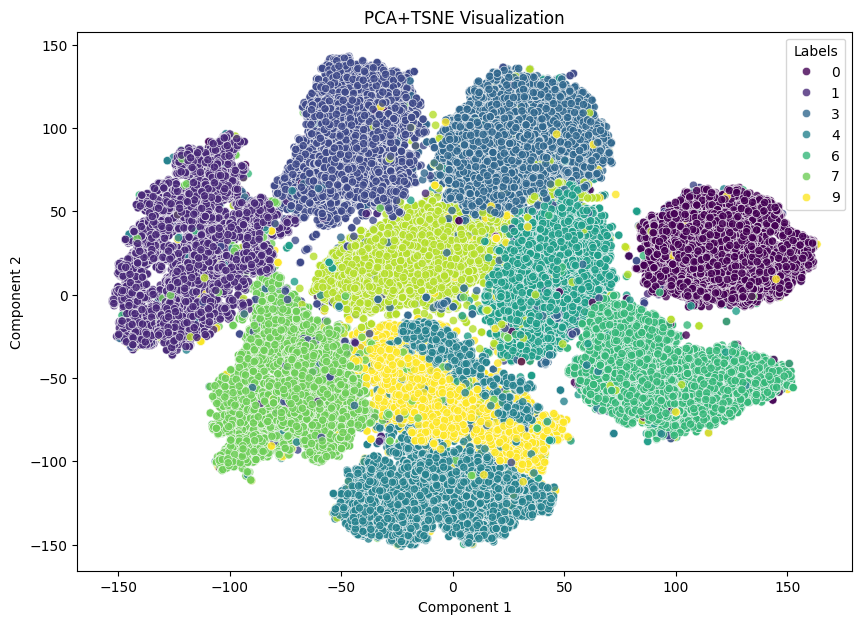

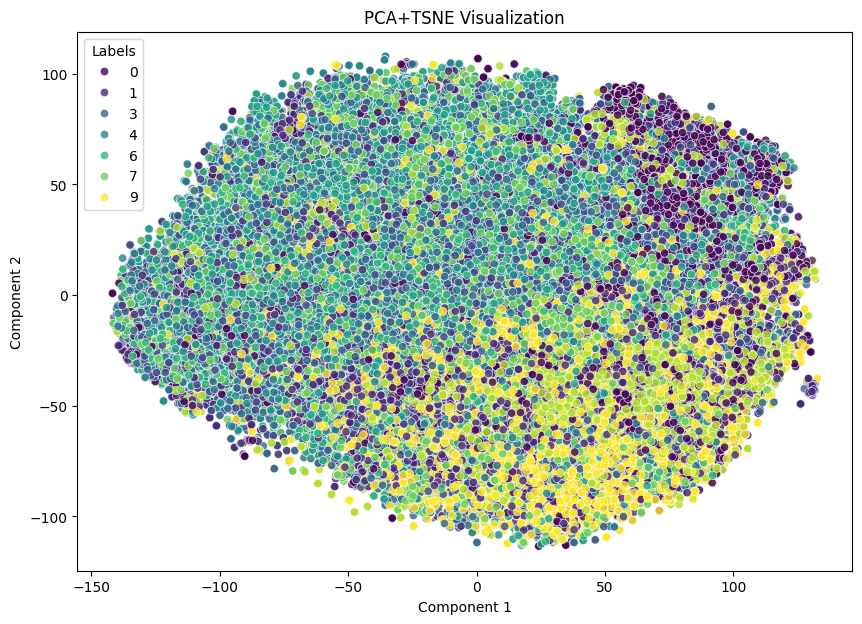

In [27]:
plot_PCA_TSNE(x_train_pca_tsne_mnist, x_test_pca_tsne_mnist, y_train_pca_tsne_mnist, y_test_pca_tsne_mnist)
plot_PCA_TSNE(x_train_pca_tsne_cifar, x_test_pca_tsne_cifar, y_train_pca_tsne_cifar, y_test_pca_tsne_cifar)

# PCA+TSNE Plot Observations

* The visualization performance of the MNIST data is much better than that of CIFAR-10
* The plot divides it into very distinct and visible clusters, while the CIFAR-10 plot contains way too much overlap in one giant glob
* Considering the type of data we are working with is flattened image data containing different digits or classes, the clustering performance visually is very important

Run the model on the PCA+TSNE data

In [29]:
mnist_adam_model_pca_tsne, mnist_adam_history_pca_tsne = train_model("adam", x_train_pca_tsne_mnist, y_train_pca_tsne_mnist, x_test_pca_tsne_mnist, y_test_pca_tsne_mnist)
mnist_sgd_model_pca_tsne, mnist_sgd_history_pca_tsne = train_model("sgd", x_train_pca_tsne_mnist, y_train_pca_tsne_mnist, x_test_pca_tsne_mnist, y_test_pca_tsne_mnist)

cifar_adam_model_pca_tsne, cifar_adam_history_pca_tsne = train_model("adam", x_train_pca_tsne_cifar, y_train_pca_tsne_cifar, x_test_pca_tsne_cifar, y_test_pca_tsne_cifar)
cifar_sgd_model_pca_tsne, cifar_sgd_history_pca_tsne = train_model("sgd", x_train_pca_tsne_cifar, y_train_pca_tsne_cifar, x_test_pca_tsne_cifar, y_test_pca_tsne_cifar)

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1750/1750 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7830 - loss: 0.6460 - val_accuracy: 0.8580 - val_loss: 0.6895
Epoch 2/100
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9538 - loss: 0.2177 - val_accuracy: 0.8601 - val_loss: 0.6915
Epoch 3/100
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9599 - loss: 0.1976 - val_accuracy: 0.8322 - val_loss: 0.6956
Epoch 4/100
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9655 - loss: 0.1789 - val_accuracy: 0.8674 - val_loss: 0.6256
Epoch 5/100
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9663 - loss: 0.1737 - val_accuracy: 0.8049 - val_loss: 0.8228
Epoch 6/100
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9665 - loss: 0.1706 - val_accuracy: 0.8454 - val_loss: 0.7094
Epoch 7/100
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9668 - loss: 0.1693 - val_accuracy: 0.8154 - val_loss: 0.7758
Epoch 8/100
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9690 - loss: 0.1616 - val_

# PCA+TSNE Stacking Data: Metrics: Accuracy, Precision, Recall and F1

438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


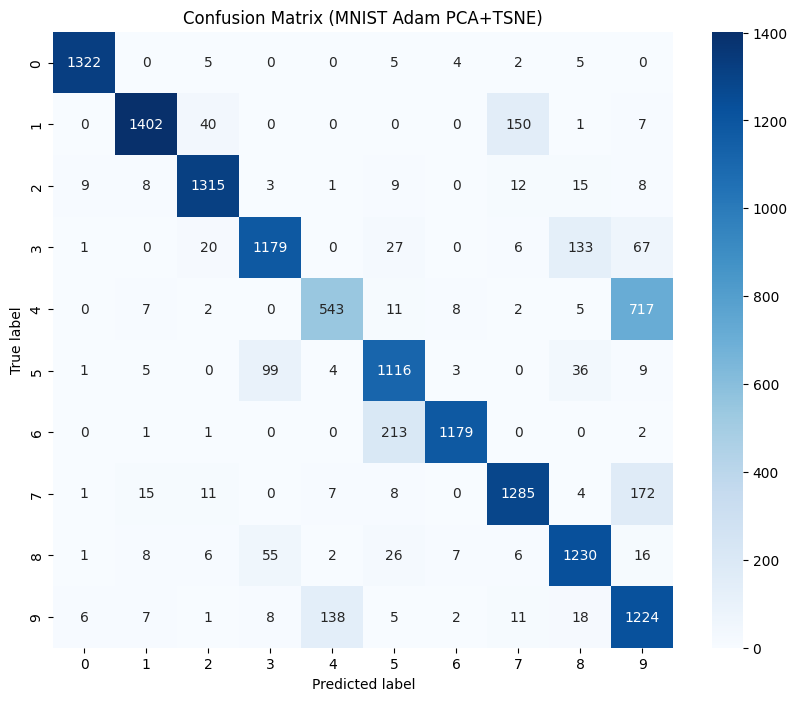

Accuracy: 0.8425, Precision: 0.8586506541495229, Recall: 0.8400131356655548, F1 Score: 0.8392936062317048
438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


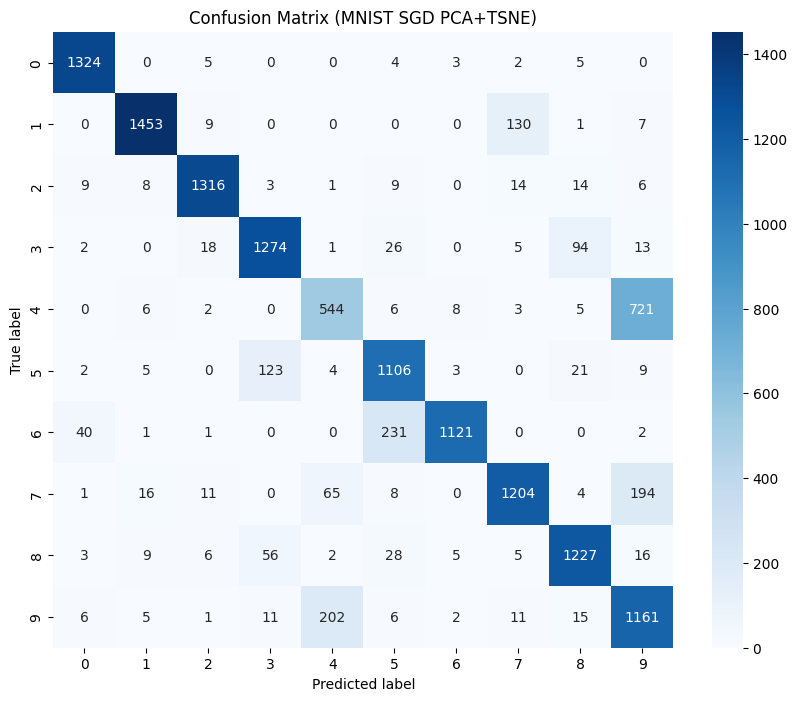

Accuracy: 0.8378571428571429, Precision: 0.8480438776803736, Recall: 0.8351414976214603, F1 Score: 0.8346636298981588
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


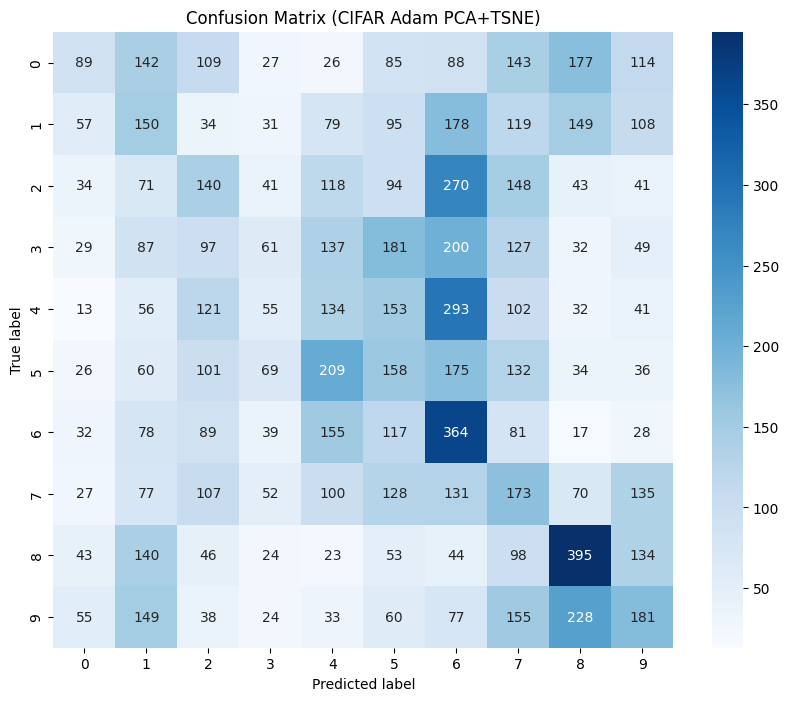

Accuracy: 0.1845, Precision: 0.18236580327305932, Recall: 0.1845, F1 Score: 0.17591230978924258
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


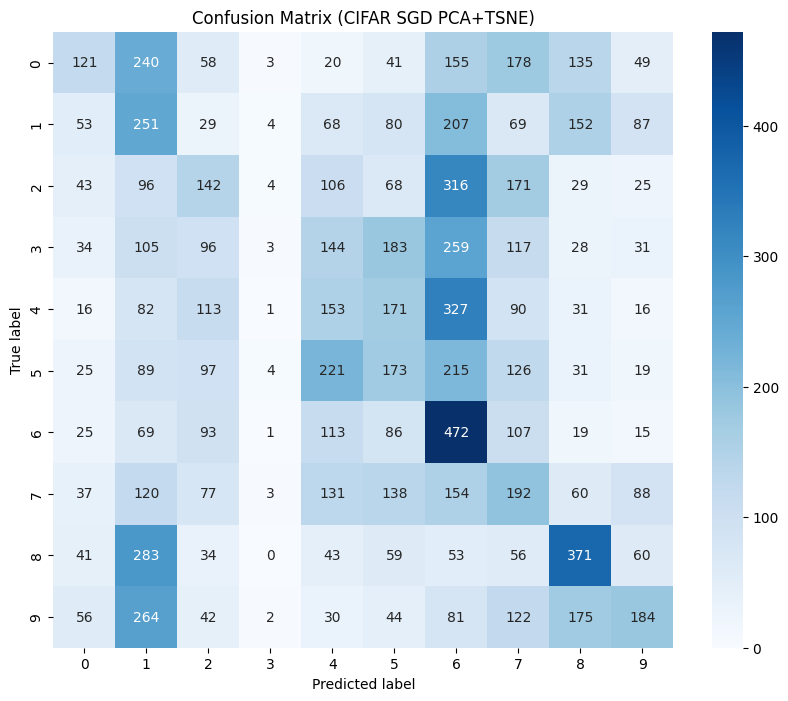

Accuracy: 0.2062, Precision: 0.2089202199231494, Recall: 0.2062, F1 Score: 0.1908355744836216


In [30]:
class_names = list(range(10))

mnist_cm_adam_pca_tsne, mnist_accuracy_adam_pca_tsne, mnist_precision_adam_pca_tsne, mnist_recall_adam_pca_tsne, mnist_f1_adam_pca_tsne = evaluate_model(
    mnist_adam_model_pca_tsne, x_test_pca_tsne_mnist, y_test_pca_tsne_mnist)
plot_confusion_matrix(mnist_cm_adam_pca_tsne, classes=class_names, title='Confusion Matrix (MNIST Adam PCA+TSNE)')
print(f"Accuracy: {mnist_accuracy_adam_pca_tsne}, Precision: {mnist_precision_adam_pca_tsne}, Recall: {mnist_recall_adam_pca_tsne}, F1 Score: {mnist_f1_adam_pca_tsne}")

mnist_cm_sgd_pca_tsne, mnist_accuracy_sgd_pca_tsne, mnist_precision_sgd_pca_tsne, mnist_recall_sgd_pca_tsne, mnist_f1_sgd_pca_tsne = evaluate_model(
    mnist_sgd_model_pca_tsne, x_test_pca_tsne_mnist, y_test_pca_tsne_mnist)
plot_confusion_matrix(mnist_cm_sgd_pca_tsne, classes=class_names, title='Confusion Matrix (MNIST SGD PCA+TSNE)')
print(f"Accuracy: {mnist_accuracy_sgd_pca_tsne}, Precision: {mnist_precision_sgd_pca_tsne}, Recall: {mnist_recall_sgd_pca_tsne}, F1 Score: {mnist_f1_sgd_pca_tsne}")

cifar_cm_adam_pca_tsne, cifar_accuracy_adam_pca_tsne, cifar_precision_adam_pca_tsne, cifar_recall_adam_pca_tsne, cifar_f1_adam_pca_tsne = evaluate_model(
    cifar_adam_model_pca_tsne, x_test_pca_tsne_cifar, y_test_pca_tsne_cifar)
plot_confusion_matrix(cifar_cm_adam_pca_tsne, classes=class_names, title='Confusion Matrix (CIFAR Adam PCA+TSNE)')
print(f"Accuracy: {cifar_accuracy_adam_pca_tsne}, Precision: {cifar_precision_adam_pca_tsne}, Recall: {cifar_recall_adam_pca_tsne}, F1 Score: {cifar_f1_adam_pca_tsne}")

cifar_cm_sgd_pca_tsne, cifar_accuracy_sgd_pca_tsne, cifar_precision_sgd_pca_tsne, cifar_recall_sgd_pca_tsne, cifar_f1_sgd_pca_tsne = evaluate_model(
    cifar_sgd_model_pca_tsne, x_test_pca_tsne_cifar, y_test_pca_tsne_cifar)
plot_confusion_matrix(cifar_cm_sgd_pca_tsne, classes=class_names, title='Confusion Matrix (CIFAR SGD PCA+TSNE)')
print(f"Accuracy: {cifar_accuracy_sgd_pca_tsne}, Precision: {cifar_precision_sgd_pca_tsne}, Recall: {cifar_recall_sgd_pca_tsne}, F1 Score: {cifar_f1_sgd_pca_tsne}")

# Metrics Observations: PCA+TSNE Stacking Data

* The metrics come down to earth for the MNIST models, going from about 0.97-98 in the first two analyses to about 0.83-85 for the stacking data
* However, the metrics for the CIFAR-10 models fall off a cliff, going all the way down to about 0.18 for ADAM and 0.20 for SGD
* Similar before though, each of the four metrics for the respective models are all about the same, once again showing balanced classes

# PCA+TSNE Stacking Data: Plot Loss

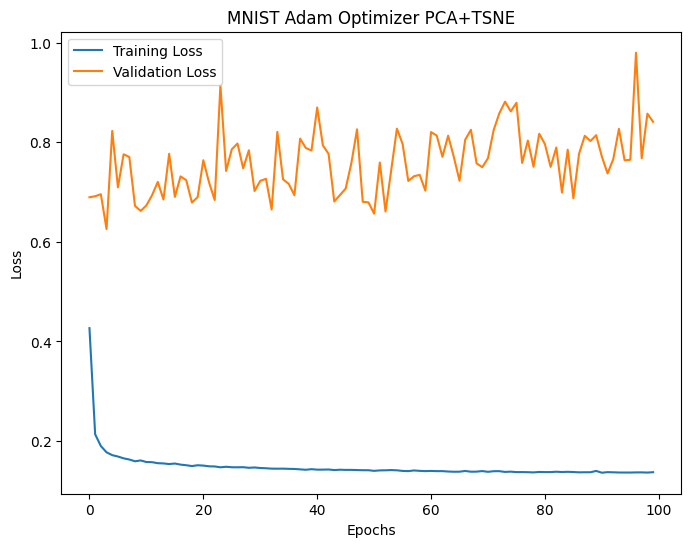

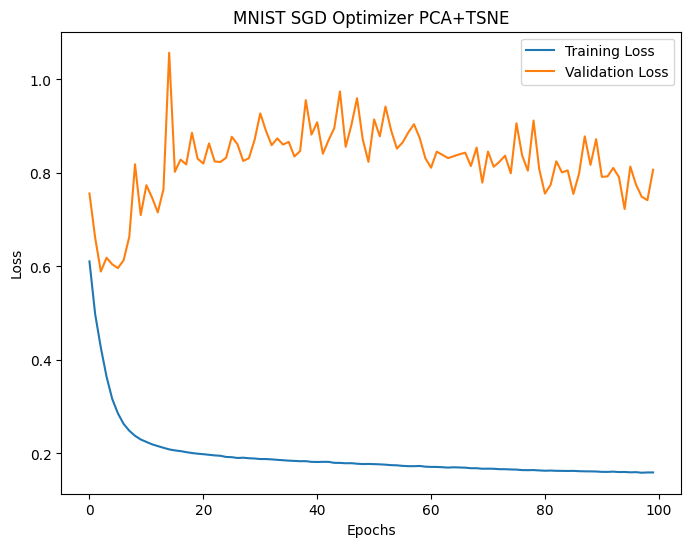

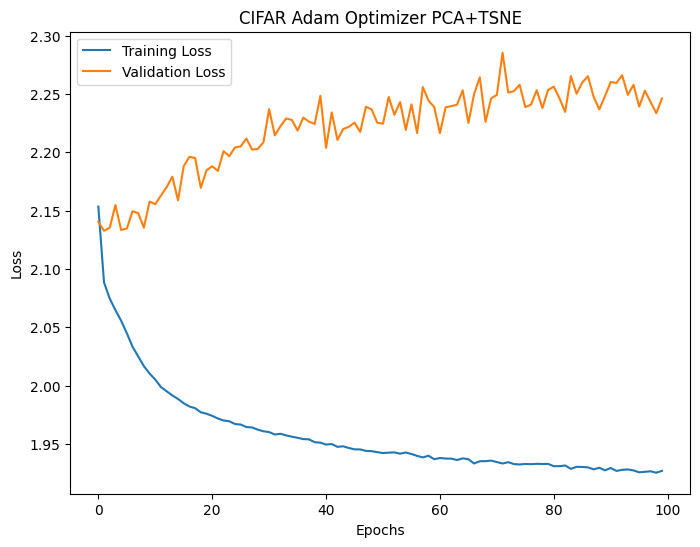

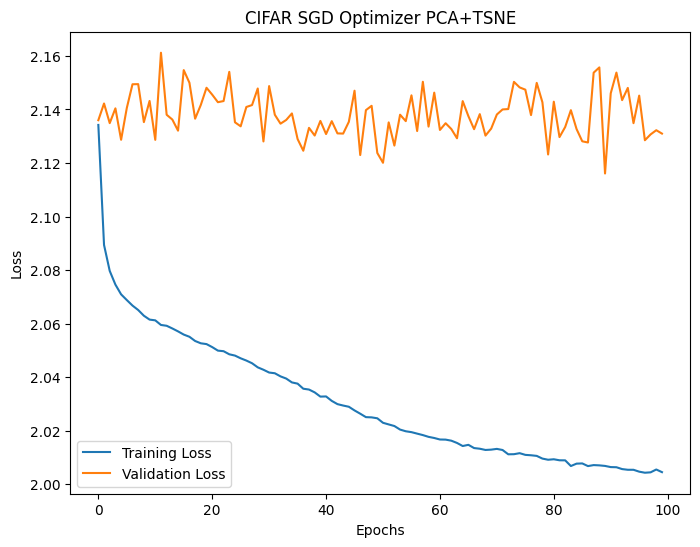

In [31]:
plot_loss(mnist_adam_history_pca_tsne, "MNIST Adam Optimizer PCA+TSNE")
plot_loss(mnist_sgd_history_pca_tsne, "MNIST SGD Optimizer PCA+TSNE")
plot_loss(cifar_adam_history_pca_tsne, "CIFAR Adam Optimizer PCA+TSNE")
plot_loss(cifar_sgd_history_pca_tsne, "CIFAR SGD Optimizer PCA+TSNE")

# Loss Plot Observations: PCA+TSNE Stacking Data

* For each of the four loss plot visualizations, the validation loss is far from the training loss
* This is the same as before with the exception of the MNIST SGD model, which in the prior two analyses had the two curves not too far from each other with a much lesser validation loss
* Every curve for each loss is much more squiggly then in the last two analyses
* However, the validation losses overall, don't seem to increase with the epochs with the exception of the CIFAR-10 ADAM model, so we might expect some more stable curves
* The MNIST SGD model which had by far the best reproducibility under the first two datasets, is now similar to the others, which by the look of the loss plots did not change much

# PCA+TSNE Stacking Data: η and η Ratios

In [32]:
eta_train_mnist_adam_pca_tsne = calculate_eta(mnist_adam_history_pca_tsne.history['loss'])
eta_val_mnist_adam_pca_tsne = calculate_eta(mnist_adam_history_pca_tsne.history['val_loss'])
eta_train_mnist_sgd_pca_tsne = calculate_eta(mnist_sgd_history_pca_tsne.history['loss'])
eta_val_mnist_sgd_pca_tsne = calculate_eta(mnist_sgd_history_pca_tsne.history['val_loss'])
eta_train_ciphar_adam_pca_tsne = calculate_eta(cifar_adam_history_pca_tsne.history['loss'])
eta_val_cifar_adam_pca_tsne = calculate_eta(cifar_adam_history_pca_tsne.history['val_loss'])
eta_train_ciphar_sgd_pca_tsne = calculate_eta(cifar_sgd_history_pca_tsne.history['loss'])
eta_val_cifar_sgd_pca_tsne = calculate_eta(cifar_sgd_history_pca_tsne.history['val_loss'])

print(f"η (PCA+TSNE MNIST, Adam, Train): {eta_train_mnist_adam_pca_tsne}, η (PCA+TSNE MNIST, Adam, Validation): {eta_val_mnist_adam_pca_tsne}")
print(f"η (PCA+TSNE MNIST, SGD, Train): {eta_train_mnist_sgd_pca_tsne}, η (PCA+TSNE MNIST, SGD, Validation): {eta_val_mnist_sgd_pca_tsne}")
print(f"η (PCA+TSNE CIFAR, Adam, Train): {eta_train_ciphar_adam_pca_tsne}, η (PCA+TSNE CIFAR, Adam, Validation): {eta_val_cifar_adam_pca_tsne}")
print(f"η (PCA+TSNE CIFAR, SGD, Train): {eta_train_ciphar_sgd_pca_tsne}, η (PCA+TSNE CIFAR, SGD, Validation): {eta_val_cifar_sgd_pca_tsne}")

η (PCA+TSNE MNIST, Adam, Train): 0.9581228708844904, η (PCA+TSNE MNIST, Adam, Validation): 0.9930650952427512
η (PCA+TSNE MNIST, SGD, Train): 0.8867987112564423, η (PCA+TSNE MNIST, SGD, Validation): 0.9908040044424752
η (PCA+TSNE CIFAR, Adam, Train): 0.999588973305412, η (PCA+TSNE CIFAR, Adam, Validation): 0.9997303303447115
η (PCA+TSNE CIFAR, SGD, Train): 0.9998648656834349, η (PCA+TSNE CIFAR, SGD, Validation): 0.9999839081957812


In [33]:
eta_ratio_mnist_adam_pca_tsne = eta_val_mnist_adam_pca_tsne / eta_train_mnist_adam_pca_tsne
eta_ratio_mnist_sgd_pca_tsne = eta_val_mnist_sgd_pca_tsne / eta_train_mnist_sgd_pca_tsne
eta_ratio_cifar_adam_pca_tsne = eta_val_cifar_adam_pca_tsne / eta_train_ciphar_adam_pca_tsne
eta_ratio_cifar_sgd_pca_tsne = eta_val_cifar_sgd_pca_tsne / eta_train_ciphar_sgd_pca_tsne

print(f"η Ratio (PCA+TSNE MNIST Adam): {eta_ratio_mnist_adam_pca_tsne}")
print(f"η Ratio (PCA+TSNE MNIST SGD): {eta_ratio_mnist_sgd_pca_tsne}")
print(f"η Ratio (PCA+TSNE CIFAR Adam): {eta_ratio_cifar_adam_pca_tsne}")
print(f"η Ratio (PCA+TSNE CIFAR SGD): {eta_ratio_cifar_sgd_pca_tsne}")

η Ratio (PCA+TSNE MNIST Adam): 1.0364694606715774
η Ratio (PCA+TSNE MNIST SGD): 1.1172817369554757
η Ratio (PCA+TSNE CIFAR Adam): 1.0001414151647072
η Ratio (PCA+TSNE CIFAR SGD): 1.000119058601249


# η and η Ratio Observations: PCA+TSNE Stacking Data

* As we hinted at, the η values for each model's training and validation losses were all high indicating a great amount of stability
* With this balance, we are greeted with η ratio values all close to 1
* The CIFAR-10 models are almost 1 right oon the dot, only ten-thousanths greater
* The MNIST models are slightly above 1, but are a major improvement over how they performed in the previous two analyses
* The ADAM MNIST is more stable than that of the SGD model with a η ratio closer to 1

# PCA+TSNE Stacking Data Overall Observations

* For the first time in the entire analysis so far, we observed signifcant change in multiple categories
* Both models lost a bit of their accuracy and other metrics, CIFAR-10 being hit very hard and having very poor performance in that regard
* The MNIST SGD model was much more similar to the other models this go round, no longer having vastly superior reproducibility
* The η values and ratios were improved and much more similar between the four models

# Training and Evaluating DNN on PCA+UMAP Stacking Data

Get new PCA+UMAP data

In [34]:
x_train_pca_umap_mnist, x_test_pca_umap_mnist = doUMAP(x_train_pca_mnist, x_test_pca_mnist, neighbor_size=5, init='spectral')
x_train_pca_umap_cifar, x_test_pca_umap_cifar = doUMAP(x_train_pca_cifar, x_test_pca_cifar, neighbor_size=5, init='spectral')
y_train_pca_umap_mnist, y_test_pca_umap_mnist = y_train_mnist, y_test_mnist
y_train_pca_umap_cifar, y_test_pca_umap_cifar = y_train_cifar, y_test_cifar

Run the model on this new data

In [35]:
mnist_adam_model_pca_umap, mnist_adam_history_pca_umap = train_model("adam", x_train_pca_umap_mnist, y_train_pca_umap_mnist, x_test_pca_umap_mnist, y_test_pca_umap_mnist)
mnist_sgd_model_pca_umap, mnist_sgd_history_pca_umap = train_model("sgd", x_train_pca_umap_mnist, y_train_pca_umap_mnist, x_test_pca_umap_mnist, y_test_pca_umap_mnist)

cifar_adam_model_pca_umap, cifar_adam_history_pca_umap = train_model("adam", x_train_pca_umap_cifar, y_train_pca_umap_cifar, x_test_pca_umap_cifar, y_test_pca_umap_cifar)
cifar_sgd_model_pca_umap, cifar_sgd_history_pca_umap = train_model("sgd", x_train_pca_umap_cifar, y_train_pca_umap_cifar, x_test_pca_umap_cifar, y_test_pca_umap_cifar)

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1750/1750 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8088 - loss: 0.5973 - val_accuracy: 0.9053 - val_loss: 0.6241
Epoch 2/100
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9605 - loss: 0.2108 - val_accuracy: 0.9046 - val_loss: 0.6141
Epoch 3/100
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9639 - loss: 0.1956 - val_accuracy: 0.9009 - val_loss: 0.5928
Epoch 4/100
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9632 - loss: 0.1959 - val_accuracy: 0.9055 - val_loss: 0.5834
Epoch 5/100
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9654 - loss: 0.1889 - val_accuracy: 0.9052 - val_loss: 0.5618
Epoch 6/100
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9660 - loss: 0.1814 - val_accuracy: 0.9054 - val_loss: 0.5593
Epoch 7/100
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9663 - loss: 0.1828 - val_accuracy: 0.8814 - val_loss: 0.5962
Epoch 8/100
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9644 - loss: 0.1868 - val_

# PCA+UMAP Stacking Data Metrics: Accuracy, Precision, Recall and F1

438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


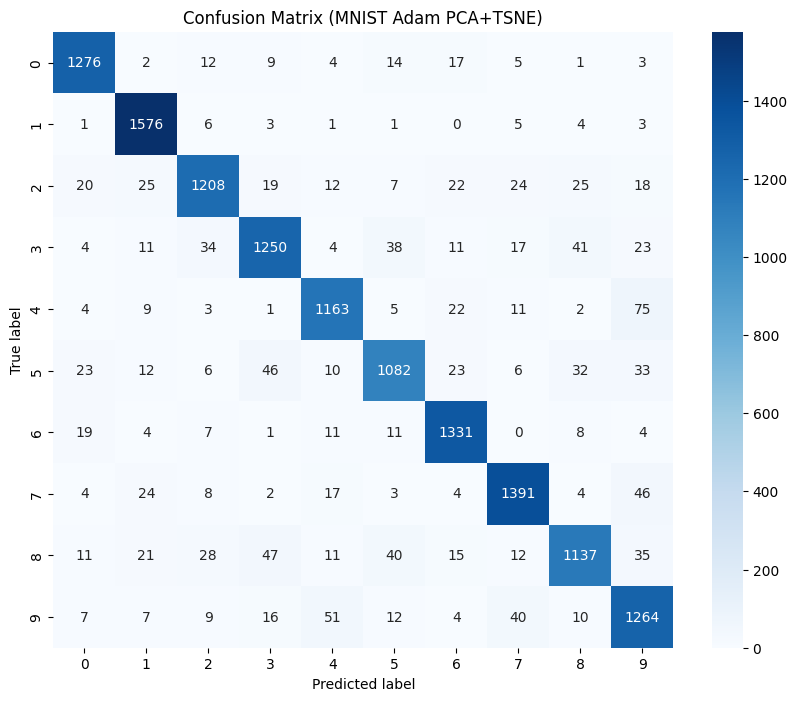

Accuracy: 0.9055714285714286, Precision: 0.9052083301672846, Recall: 0.9037739393037368, F1 Score: 0.9040833741203709
438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


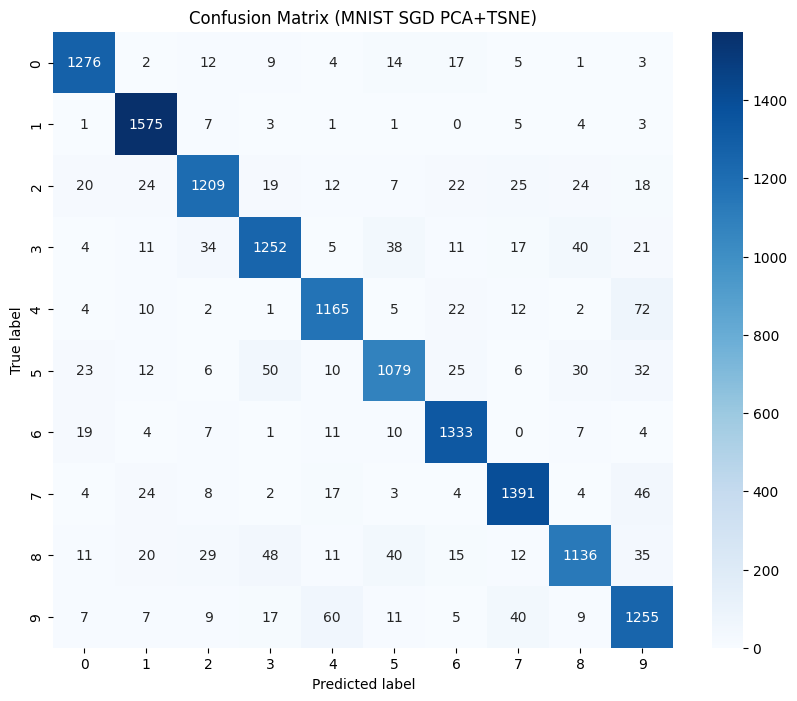

Accuracy: 0.9050714285714285, Precision: 0.9046278903672998, Recall: 0.9032780184723714, F1 Score: 0.9035482747305025
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


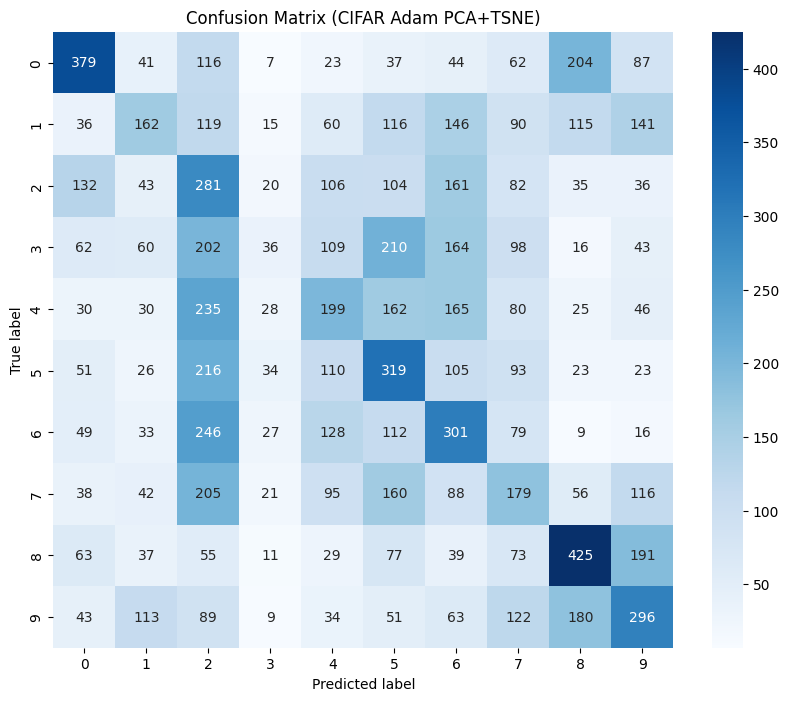

Accuracy: 0.2577, Precision: 0.2607916787803966, Recall: 0.2577, F1 Score: 0.25027766995436407
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


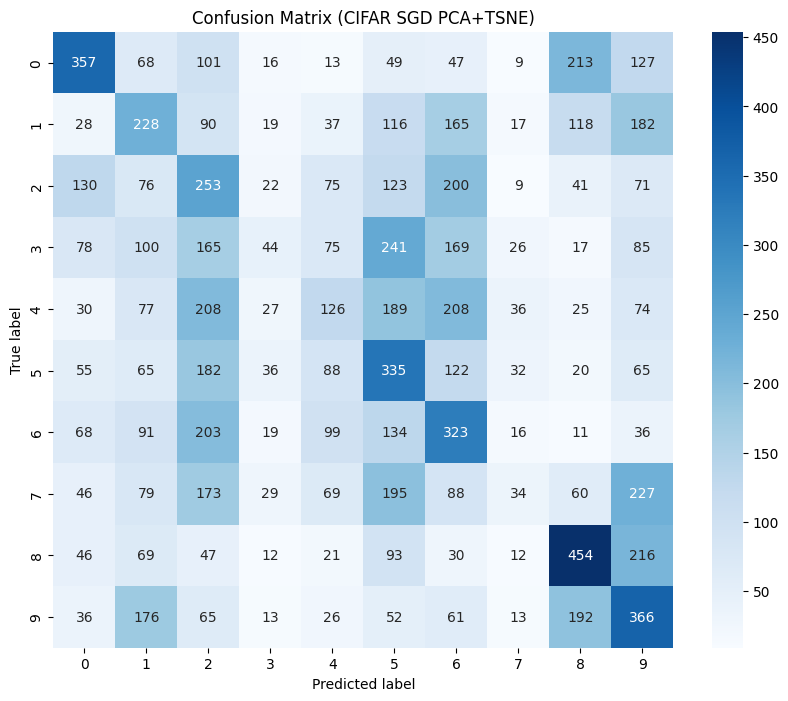

Accuracy: 0.252, Precision: 0.24478246996148362, Recall: 0.252, F1 Score: 0.2345396639816315


In [36]:
class_names = list(range(10))

mnist_cm_adam_pca_umap, mnist_accuracy_adam_pca_umap, mnist_precision_adam_pca_umap, mnist_recall_adam_pca_umap, mnist_f1_adam_pca_umap = evaluate_model(
    mnist_adam_model_pca_umap, x_test_pca_umap_mnist, y_test_pca_umap_mnist)
plot_confusion_matrix(mnist_cm_adam_pca_umap, classes=class_names, title='Confusion Matrix (MNIST Adam PCA+TSNE)')
print(f"Accuracy: {mnist_accuracy_adam_pca_umap}, Precision: {mnist_precision_adam_pca_umap}, Recall: {mnist_recall_adam_pca_umap}, F1 Score: {mnist_f1_adam_pca_umap}")

mnist_cm_sgd_pca_umap, mnist_accuracy_sgd_pca_umap, mnist_precision_sgd_pca_umap, mnist_recall_sgd_pca_umap, mnist_f1_sgd_pca_umap = evaluate_model(
    mnist_sgd_model_pca_umap, x_test_pca_umap_mnist, y_test_pca_umap_mnist)
plot_confusion_matrix(mnist_cm_sgd_pca_umap, classes=class_names, title='Confusion Matrix (MNIST SGD PCA+TSNE)')
print(f"Accuracy: {mnist_accuracy_sgd_pca_umap}, Precision: {mnist_precision_sgd_pca_umap}, Recall: {mnist_recall_sgd_pca_umap}, F1 Score: {mnist_f1_sgd_pca_umap}")

cifar_cm_adam_pca_umap, cifar_accuracy_adam_pca_umap, cifar_precision_adam_pca_umap, cifar_recall_adam_pca_umap, cifar_f1_adam_pca_umap = evaluate_model(
    cifar_adam_model_pca_umap, x_test_pca_umap_cifar, y_test_pca_umap_cifar)
plot_confusion_matrix(cifar_cm_adam_pca_umap, classes=class_names, title='Confusion Matrix (CIFAR Adam PCA+TSNE)')
print(f"Accuracy: {cifar_accuracy_adam_pca_umap}, Precision: {cifar_precision_adam_pca_umap}, Recall: {cifar_recall_adam_pca_umap}, F1 Score: {cifar_f1_adam_pca_umap}")

cifar_cm_sgd_pca_umap, cifar_accuracy_sgd_pca_umap, cifar_precision_sgd_pca_umap, cifar_recall_sgd_pca_umap, cifar_f1_sgd_pca_umap = evaluate_model(
    cifar_sgd_model_pca_umap, x_test_pca_umap_cifar, y_test_pca_umap_cifar)
plot_confusion_matrix(cifar_cm_sgd_pca_umap, classes=class_names, title='Confusion Matrix (CIFAR SGD PCA+TSNE)')
print(f"Accuracy: {cifar_accuracy_sgd_pca_umap}, Precision: {cifar_precision_sgd_pca_umap}, Recall: {cifar_recall_sgd_pca_umap}, F1 Score: {cifar_f1_sgd_pca_umap}")

# Metrics Observations: PCA+UMAP Stacking Data

* The metrics here are more similar to that of the PCA+TSNE embeddings rather than the first two
* They are slightly improved for each model, however with the MNIST models going up to about 0.90, and the CIFAR-10 models increasing to about 0.25
* The optimizers perform about the same for MNIST, but ADAM slightly outperforms SGD in its precision and F1 score for CIFAR-10
* A common pattern we see here is the balance of classes

# PCA+UMAP Stacking Data: Plot Loss

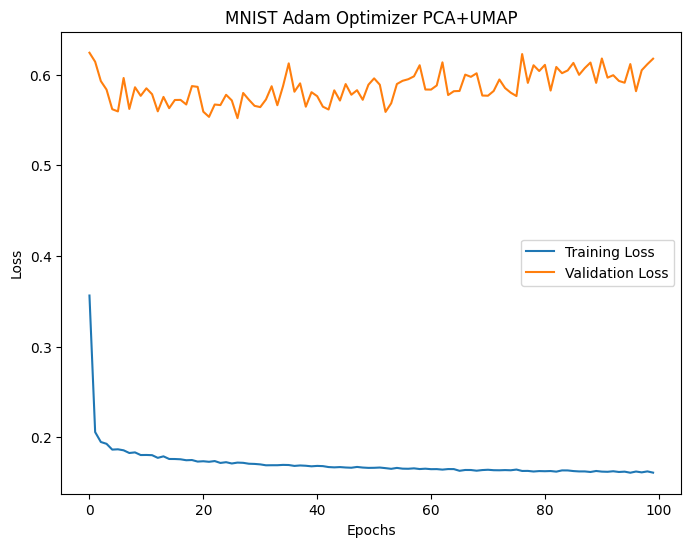

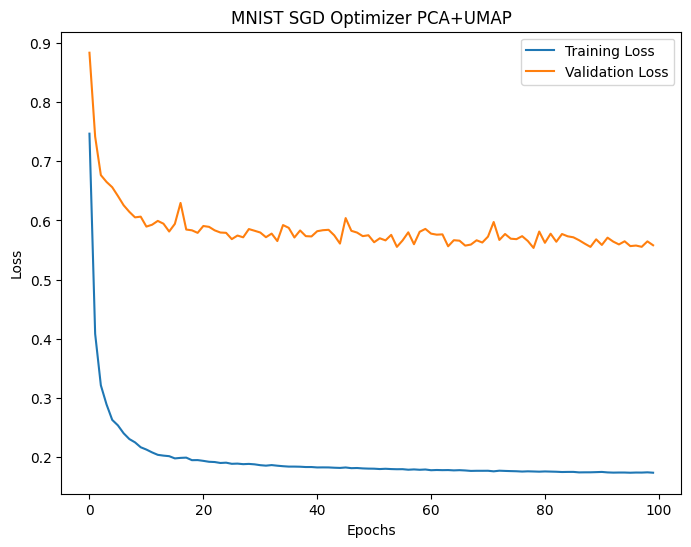

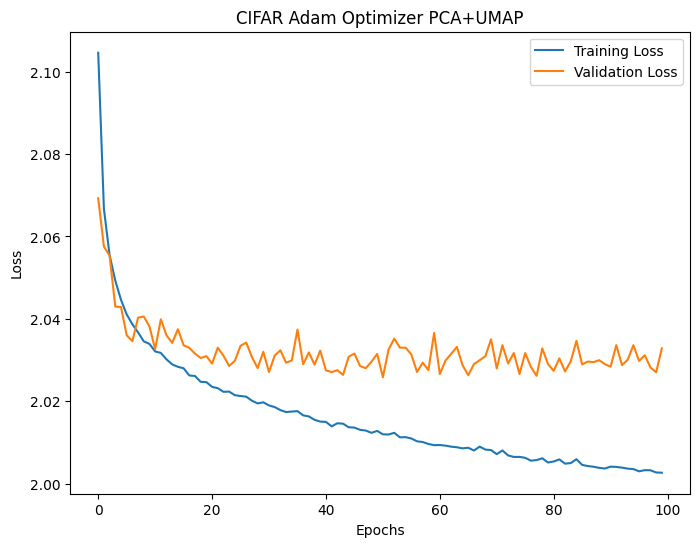

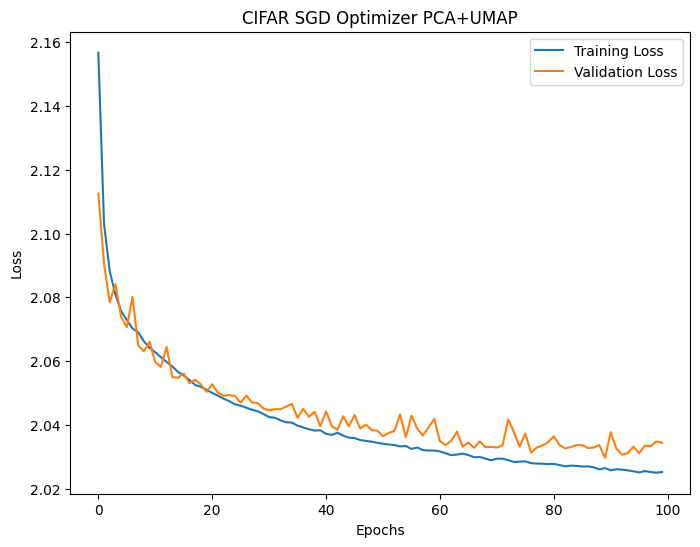

In [37]:
plot_loss(mnist_adam_history_pca_umap, "MNIST Adam Optimizer PCA+UMAP")
plot_loss(mnist_sgd_history_pca_umap, "MNIST SGD Optimizer PCA+UMAP")
plot_loss(cifar_adam_history_pca_umap, "CIFAR Adam Optimizer PCA+UMAP")
plot_loss(cifar_sgd_history_pca_umap, "CIFAR SGD Optimizer PCA+UMAP")

# Loss Plot Observations PCA+UMAP Stacking Data
* Where we didn't see too much change when it came to the metrics that is not the case at all for the loss plot visualizations
* It would appear that we have some of our best performances under this embedding
* The CIFAR models have the closest related validation and training loss curves, leading us to assume that they have very good reproducibility
* The SGD for CIFAR has nearly identical curves
* For MNIST however, there is great distance between the two curves
* Similar to the previous stacking method, there isn't too much change in the validation loss outside of the first few epochs, suggesting that these curves are indeed stable

# PCA+UMAP Stacking Data: η and η Ratios

In [38]:
eta_train_mnist_adam_pca_umap = calculate_eta(mnist_adam_history_pca_umap.history['loss'])
eta_val_mnist_adam_pca_umap = calculate_eta(mnist_adam_history_pca_umap.history['val_loss'])
eta_train_mnist_sgd_pca_umap = calculate_eta(mnist_sgd_history_pca_umap.history['loss'])
eta_val_mnist_sgd_pca_umap = calculate_eta(mnist_sgd_history_pca_umap.history['val_loss'])
eta_train_ciphar_adam_pca_umap = calculate_eta(cifar_adam_history_pca_umap.history['loss'])
eta_val_cifar_adam_pca_umap = calculate_eta(cifar_adam_history_pca_umap.history['val_loss'])
eta_train_ciphar_sgd_pca_umap = calculate_eta(cifar_sgd_history_pca_umap.history['loss'])
eta_val_cifar_sgd_pca_umap = calculate_eta(cifar_sgd_history_pca_umap.history['val_loss'])

print(f"η (PCA+UMAP MNIST, Adam, Train): {eta_train_mnist_adam_pca_umap}, η (PCA+UMAP MNIST, Adam, Validation): {eta_val_mnist_adam_pca_umap}")
print(f"η (PCA+UMAP MNIST, SGD, Train): {eta_train_mnist_sgd_pca_umap}, η (PCA+UMAP MNIST, SGD, Validation): {eta_val_mnist_sgd_pca_umap}")
print(f"η (PCA+UMAP CIFAR, Adam, Train): {eta_train_ciphar_adam_pca_umap}, η (PCA+UMAP CIFAR, Adam, Validation): {eta_val_cifar_adam_pca_umap}")
print(f"η (PCA+UMAP CIFAR, SGD, Train): {eta_train_ciphar_sgd_pca_umap}, η (PCA+UMAP CIFAR, SGD, Validation): {eta_val_cifar_sgd_pca_umap}")

η (PCA+UMAP MNIST, Adam, Train): 0.9858781284871532, η (PCA+UMAP MNIST, Adam, Validation): 0.9991519743168973
η (PCA+UMAP MNIST, SGD, Train): 0.8940695661238083, η (PCA+UMAP MNIST, SGD, Validation): 0.9951721450543217
η (PCA+UMAP CIFAR, Adam, Train): 0.999944263350354, η (PCA+UMAP CIFAR, Adam, Validation): 0.9999904892377781
η (PCA+UMAP CIFAR, SGD, Train): 0.9999113091453162, η (PCA+UMAP CIFAR, SGD, Validation): 0.9999510842089449


In [39]:
eta_ratio_mnist_adam_pca_umap = eta_val_mnist_adam_pca_umap / eta_train_mnist_adam_pca_umap
eta_ratio_mnist_sgd_pca_umap = eta_val_mnist_sgd_pca_umap / eta_train_mnist_sgd_pca_umap
eta_ratio_cifar_adam_pca_umap = eta_val_cifar_adam_pca_umap / eta_train_ciphar_adam_pca_umap
eta_ratio_cifar_sgd_pca_umap = eta_val_cifar_sgd_pca_umap / eta_train_ciphar_sgd_pca_umap

print(f"η Ratio (PCA+UMAP MNIST Adam): {eta_ratio_mnist_adam_pca_umap}")
print(f"η Ratio (PCA+UMAP MNIST SGD): {eta_ratio_mnist_sgd_pca_umap}")
print(f"η Ratio (PCA+UMAP CIFAR Adam): {eta_ratio_cifar_adam_pca_umap}")
print(f"η Ratio (PCA+UMAP CIFAR SGD): {eta_ratio_cifar_sgd_pca_umap}")

η Ratio (PCA+UMAP MNIST Adam): 1.0134639824600968
η Ratio (PCA+UMAP MNIST SGD): 1.1130813336694128
η Ratio (PCA+UMAP CIFAR Adam): 1.000046228464044
η Ratio (PCA+UMAP CIFAR SGD): 1.000039778591626


# η and η Ratio Observations: PCA+UMAP Stacking Data

* Similar to PCA+TSNE, the η ratios for both CIFAR-10 models are nearly 1 right on the dot
* This time however, MNIST ADAM improves to 1.01, also becoming a nearly perfect stable model
* The MNIST model improves as well, but is brought down by a η training value of 0.89, which although good, is not as high as the others

# Overall Observations: PCA+UMAP Stacking Data

* PCA+UMAP appeared to be a better fit for these data and models than that of PCA+TSNE
* The reproducibility of the CIFAR models experienced vast improvement here, even if it meant that the MNIST models, mainly SGD were not as good as they were under the non-reduced and PCA data
* The metrics although not as good as the original and PCA data, were better than that of PCA+TSNE while once again maintaining class balance
* The stability was improved here over the previous three analyses illustrating models least prone to underfitting and overfitting

# Conclusion

* Today, we ran many different algorithms and models, which even with the help of GPU was definitely tedious
* In the majority of the cases, it was the data itself that greater effects on metrics and overall perforamce than the optimizer methods
* Although the metrics were not great at all for any of the CIFAR-10 data, there was not any class imbalance for a single model ran today
* Overall, there was no specific model that we could say was the best; each dimension reduction method, data, or optimizer had its many different pros and cons, with many attributes being a trade off for one another, which is what defines the complex challenge that is Big Data and Deep Learning